## Reproduce results in Figure 5

Related dataset: 
- [Xenium colorectal cancer](https://www.10xgenomics.com/cn/datasets/preview-data-ffpe-human-lung-cancer-with-xenium-multimodal-cell-segmentation-1-standard)
- [VisiumHD colorectal cancer](https://www.10xgenomics.com/cn/datasets/preview-data-ffpe-human-lung-cancer-with-xenium-multimodal-cell-segmentation-1-standard)

> **_NOTE:_**  These two datasets are used as examples to show the usage of CellART. Visualizations of figure 5g are in [figure 6 notebook](https://cellart.readthedocs.io/en/latest/tutorials/figure_6.html) with section named `Visualization for figure 5g`.



Reference can be download [here](11)

VisiumHD colorectal cancer are training with epoch settings: `epochs = 400` `seg_training_epochs = 15` `deconv_warmup_epochs = 200` and Xenium coloretal cancer are training with epochs settings: `epochs = 200` `seg_training_epochs = 10` `deconv_warmup_epochs = 100`

All the data for reproducing the result can be downloaded [here](temp_link)

In [12]:
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

### CellART annotation on Xenium and VisiumHD colorectal cancer datasets

In [1]:
celltype_mapping = {
    'CAF': '#117733',  # Green
    'CD4 T cell': '#88CCEE',  # Light Blue
    'CD8 Cytotoxic T cell': '#CC6677',  # Pink
    'Endothelial': '#DDCC77',  # Sand Yellow
    'Enteric Glial': '#332288',  # Dark Blue
    'Enterocyte': '#AA4499',  # Purple
    'Epithelial': '#44AA99',  # Teal
    'Fibroblast': '#999933',  # Olive
    'Goblet': '#A1C935',  # Lime
    'Lymphatic Endothelial': '#661100',  # Brown
    'Macrophage': '#6699CC',  # Sky Blue
    'Mast': '#AA4466',  # Rose
    'Mature B': '#888888',  # Gray
    'Myofibroblast': '#117755',  # Forest Green
    'Neuroendocrine': '#332299',  # Indigo
    'Neutrophil': '#D95F02',  # Replaced duplicate pink
    'Pericytes': '#1B9E77',  # Replaced duplicate teal
    'Plasma': '#E6AB02',  # Replaced duplicate olive
    'Proliferating Immune II': '#882255',  # Burgundy
    'SM Stress Response': '#66C2A5',  # Replaced duplicate blue
    'Smooth Muscle': '#A6761D',  # Replaced duplicate brown
    'Tuft': '#7570B3',  # Replaced duplicate green
    'Tumor I': '#E7298A',  # Replaced duplicate coral
    'Tumor II': '#6A3D9A',  # Replaced duplicate navy
    'Tumor III': '#FFA500',  # Orange
    'Tumor V': '#FFD92F',  # Replaced duplicate mustard
    'Unknown III (SM)': '#B2DF8A',  # Replaced duplicate green
    'mRegDC': '#1F78B4',  # Replaced duplicate blue
    'pDC': '#8C510A',  # Replaced duplicate brown
    'vSM': '#5AB4AC',  # Replaced duplicate jade green
    "Unassigned": "lightgray",
}

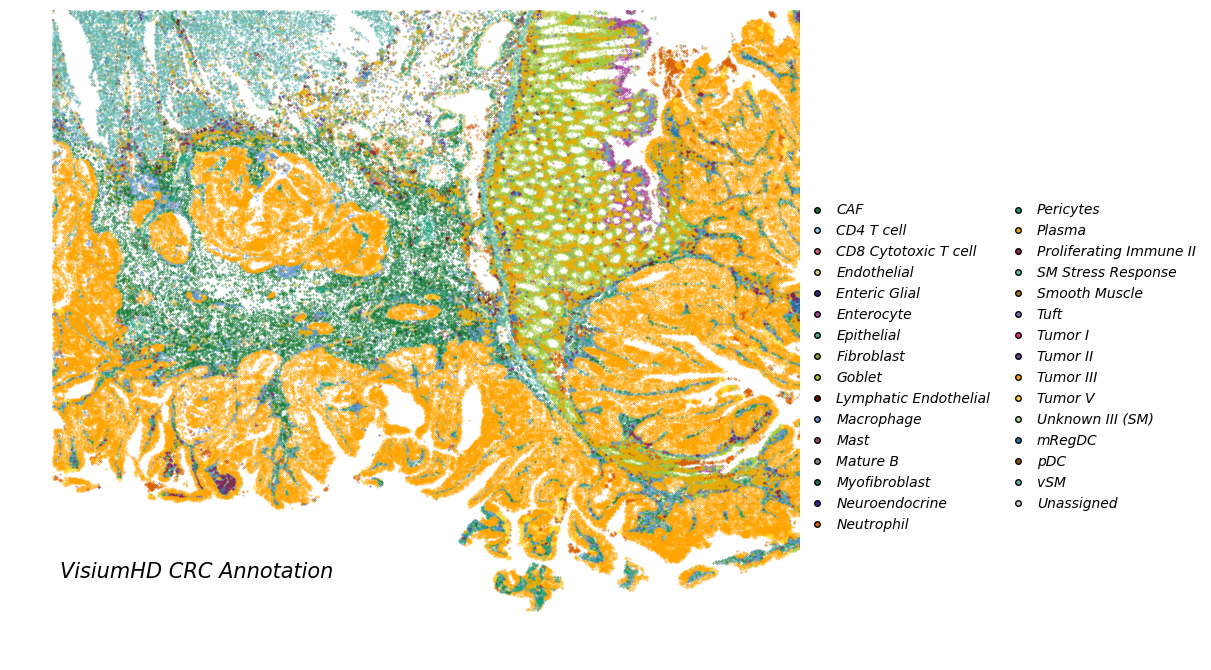

In [7]:
adata_st_svt = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumHD_P2_CRC_Annotation/epoch_400/cell_deconv.h5ad")

fig, ax = plt.subplots(1, 4, figsize=(12, 8))
gs = GridSpec(1, 4, figure=fig)

for ax_ in ax.flatten():
    fig.delaxes(ax_)

ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3])

celltype_names = list(celltype_mapping.keys())
# selected_celltype = ["Tumor II", "Tumor III", "Tumor V"]
selected_celltype = celltype_names
selected_celltype = celltype_names
for i in range(len(celltype_names)):
    # (0,0) is on the top left corner
    if celltype_names[i] not in selected_celltype:
        continue
    sub_df = adata_st_svt[adata_st_svt.obs["celltype"] == celltype_names[i - 1]].obs
    ax1.scatter(sub_df["y"], sub_df["x"], s=0.1, label=celltype_names[i - 1], color=celltype_mapping[celltype_names[i - 1]])
# ax1.invert_yaxis()
ax1.axis("off")
ax1.set_xlim(adata_st_svt.obs["x"].min(), adata_st_svt.obs["x"].max())
ax1.set_ylim(adata_st_svt.obs["y"].min(), adata_st_svt.obs["y"].max())
ax1.invert_yaxis()
legend_elements = [Line2D([0], [0], marker= None, color='b', label="VisiumHD CRC Annotation", linewidth=0,
                      markeredgecolor="#000000", markerfacecolor="#000000", markersize=15)]
ax1.legend(
    handles=legend_elements,
    loc='upper left',               # Align the legend to the upper-left corner
    bbox_to_anchor=(-0.07, 0.18),          # Coordinates for the upper-left corner of ax1
    ncol=1,                         # Number of columns
    handletextpad=0.,               # Spacing between marker and text
    prop={'size': 15, 'style': 'italic'},  # Font size and style
    frameon=False                   # No border for the legend
)

# Add legend elements (example)
legend_elements = [
    Line2D(
        [0], [0],
        marker='o',
        linestyle='None',
        color='w',
        label=label,
        markerfacecolor=color,
        markeredgecolor='k',
        markersize=4
    ) for label, color in celltype_mapping.items()
]

# Add the legend below the entire figure, centered horizontally with [0, 1] subfigures
ax2.legend(
    handles=legend_elements,
    loc='center',                    # Center the legend within the bounding box
    bbox_to_anchor=(0.48, 0.45),       # Center of ax2 (0.5, 0.5 is the middle of the axis)
    ncol=2,                          # Number of columns for the legend
    handletextpad=0.35,               # Spacing between marker and text
    columnspacing=1,               # Spacing between legend columns
    prop={'size': 10, 'style': 'italic'},  # Font size and style
    frameon=False                    # No border for the legend
)


ax2.axis("off")  # Hide the axis for ax2
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space for the legend below the plots
plt.show()


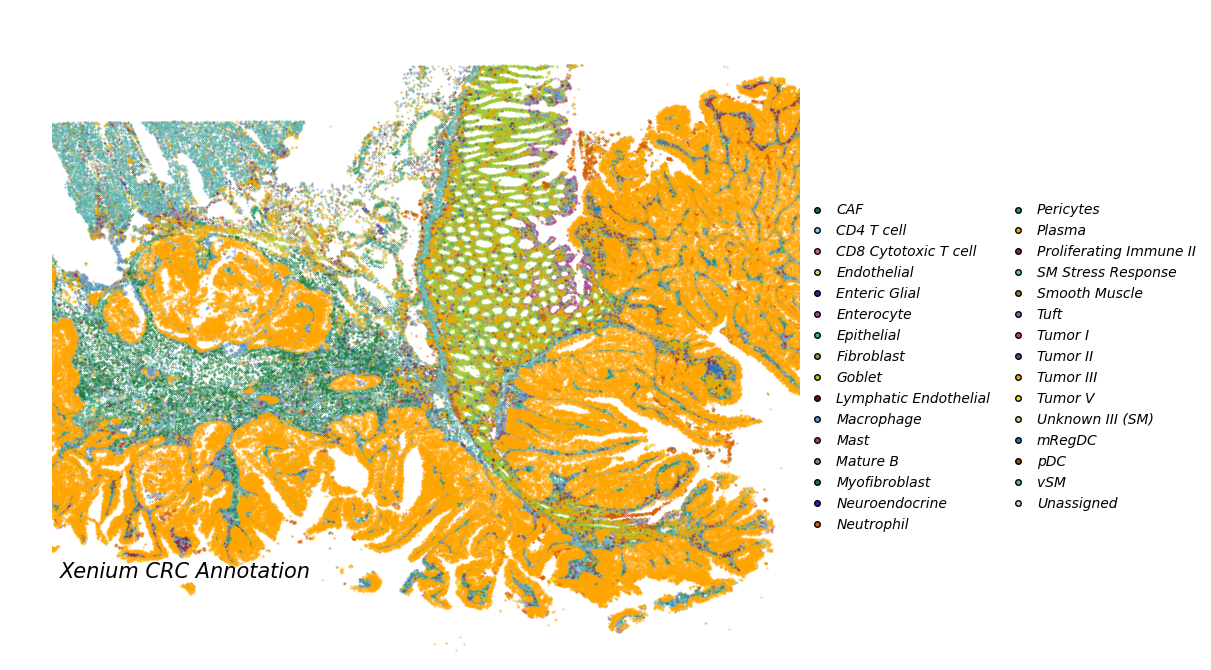

In [10]:
adata_st_svt = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/Xenium_P2_CRC_Annotation/epoch_200/cell_deconv.h5ad")

fig, ax = plt.subplots(1, 4, figsize=(12, 8))
gs = GridSpec(1, 4, figure=fig)

for ax_ in ax.flatten():
    fig.delaxes(ax_)

ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3])

celltype_names = list(celltype_mapping.keys())
# selected_celltype = ["Tumor II", "Tumor III", "Tumor V"]
selected_celltype = celltype_names
selected_celltype = celltype_names
for i in range(len(celltype_names)):
    # (0,0) is on the top left corner
    if celltype_names[i] not in selected_celltype:
        continue
    sub_df = adata_st_svt[adata_st_svt.obs["celltype"] == celltype_names[i - 1]].obs
    ax1.scatter(sub_df["x"], sub_df["y"], s=0.1, label=celltype_names[i - 1], color=celltype_mapping[celltype_names[i - 1]])
# ax1.invert_yaxis()
ax1.axis("off")
ax1.set_xlim(adata_st_svt.obs["y"].min(), adata_st_svt.obs["y"].max())
ax1.set_ylim(adata_st_svt.obs["x"].min(), adata_st_svt.obs["x"].max())
ax1.invert_xaxis()
legend_elements = [Line2D([0], [0], marker= None, color='b', label="Xenium CRC Annotation", linewidth=0,
                      markeredgecolor="#000000", markerfacecolor="#000000", markersize=15)]
ax1.legend(
    handles=legend_elements,
    loc='upper left',               # Align the legend to the upper-left corner
    bbox_to_anchor=(-0.07, 0.18),          # Coordinates for the upper-left corner of ax1
    ncol=1,                         # Number of columns
    handletextpad=0.,               # Spacing between marker and text
    prop={'size': 15, 'style': 'italic'},  # Font size and style
    frameon=False                   # No border for the legend
)

# Add legend elements (example)
legend_elements = [
    Line2D(
        [0], [0],
        marker='o',
        linestyle='None',
        color='w',
        label=label,
        markerfacecolor=color,
        markeredgecolor='k',
        markersize=4
    ) for label, color in celltype_mapping.items()
]

# Add the legend below the entire figure, centered horizontally with [0, 1] subfigures
ax2.legend(
    handles=legend_elements,
    loc='center',                    # Center the legend within the bounding box
    bbox_to_anchor=(0.48, 0.45),       # Center of ax2 (0.5, 0.5 is the middle of the axis)
    ncol=2,                          # Number of columns for the legend
    handletextpad=0.35,               # Spacing between marker and text
    columnspacing=1,               # Spacing between legend columns
    prop={'size': 10, 'style': 'italic'},  # Font size and style
    frameon=False                    # No border for the legend
)


ax2.axis("off")  # Hide the axis for ax2
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space for the legend below the plots
plt.show()


### Visualization and Doublet

In [11]:
from spatialdata_io import xenium, visium_hd
import spatialdata as sd
import spatialdata_plot

sdata_hd = visium_hd("/import/home3/yhchenmath/Dataset/DeconvSeg/CRC/VisiumHD_P2_CRC/")

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [13]:
svt_segmentation = np.load("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumHD_P2_CRC_Annotation/new_segmentation_mask.npy")
nucl_segmentation = np.load("/import/home2/yhchenmath/Code/Triplet/Data/VisiumHD_P2_CRC/segmentation_mask.npy")
spot_id_map = np.load("/import/home2/yhchenmath/Code/Triplet/Data/VisiumHD_P2_CRC/spot_id_map.npy")
adata_st_svt = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumHD_P2_CRC_Annotation/epoch_400/cell_deconv.h5ad")

In [14]:
adata_st_bin2cell = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/VisiumHD_P2_CRC/cdata_expended_scvi.h5ad")
adata_st_stardist = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/VisiumHD_P2_CRC/cdata_scvi.h5ad")
adata_st_bin2cell.X = adata_st_bin2cell.layers["counts"]
adata_st_stardist.X = adata_st_stardist.layers["counts"]

In [15]:
adata = sdata_hd.tables["square_008um"]
df_rctd = pd.read_csv("/import/home2/yhchenmath/Code/Triplet/Data/VisiumHD_P2_CRC/DeconvolutionResults_P2CRC.csv", index_col=0)
df_rctd = df_rctd.dropna(subset=["DeconvolutionClass"])
df_rctd["DeconvolutionClass"] = df_rctd["DeconvolutionClass"].replace({
    "doublet_certain": "doublet",
    "doublet_uncertain": "doublet",
    "reject": "doublet"
})
df_rctd = df_rctd.merge(adata.obs[["array_row", "array_col"]], left_index=True, right_index=True)
# Drop: Memroy B, NK, Tumor IV, cDC I
# Rename: CD8 T cell -> CD8 Cytotoxic T cell, Proliferating Fibroblast -> Myofibroblast, Proliferating Macrophage -> Macrophage, Vacular Fibroblast -> Fibroblast
df_rctd = df_rctd[~df_rctd["DeconvolutionLabel1"].isin(["Memory B", "NK", "Tumor IV", "cDC I", "Adipocyte"])]
df_rctd["DeconvolutionLabel1"] = df_rctd["DeconvolutionLabel1"].replace({
    "CD8 T cell": "CD8 Cytotoxic T cell",
    "Proliferating Fibroblast": "Myofibroblast",
    "Proliferating Macrophages": "Macrophage",
    "Vascular Fibroblast": "Fibroblast"
})

adata_filtered = adata[adata.obs.index.isin(df_rctd.index)]
adata_filtered.obs["celltype"] = df_rctd["DeconvolutionLabel1"][adata_filtered.obs.index].astype("category")
adata_filtered.obs["rctdtype"] = df_rctd["DeconvolutionClass"][adata_filtered.obs.index].astype("category")
sdata_hd.tables["rctd_008um_all"] = adata_filtered

ct_rctd = sdata_hd.tables["rctd_008um_all"].obs[["location_id", "celltype", "rctdtype", "array_col", "array_row"]]
# Set index to location_id
ct_rctd.set_index("location_id", inplace=True)
sdata_hd.shapes["rctd_square_008um_all"] = sdata_hd.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"][sdata_hd.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"].index.isin(ct_rctd.index)]
sdata_hd.shapes["rctd_square_008um_all"]['celltype'] = ct_rctd['celltype'].astype("category")
sdata_hd.shapes["rctd_square_008um_all"]['rctdtype'] = ct_rctd['rctdtype'].astype("category")
sdata_hd.shapes["rctd_square_008um_all"]['array_row'] = ct_rctd['array_row']
sdata_hd.shapes["rctd_square_008um_all"]['array_col'] = ct_rctd['array_col']

sdata_hd.shapes["rctd_square_008um_doublet"] = sdata_hd.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"][sdata_hd.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"].index.isin(ct_rctd[ct_rctd['rctdtype'] == "doublet"].index)]
sdata_hd.shapes["rctd_square_008um_single"] = sdata_hd.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"][sdata_hd.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"].index.isin(ct_rctd[ct_rctd['rctdtype'] == "singlet"].index)]

/tmp/ipykernel_1031590/493700504.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_filtered.obs["celltype"] = df_rctd["DeconvolutionLabel1"][adata_filtered.obs.index].astype("category")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [16]:
import scanpy as sc

sc_adata = sc.read("/import/home3/yhchenmath/Dataset/DeconvSeg/CRC/scRNA_ref/adata_sc_p2.h5ad")

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [19]:
from cellart.utils.spatialdata_utils import append_visiumhd_boundary

append_visiumhd_boundary(
    segmentation_mask = svt_segmentation,
    spot_id_map = spot_id_map,
    sdata = sdata_hd,
    shape_key = "Visium_HD_Human_Colon_Cancer_P2_square_002um",
    new_shape_key = "svt_seg",
    celltype= adata_st_svt.obs["celltype"]
)
# sdata hd svt_seg drop nan
sdata_hd.shapes["svt_seg"] = sdata_hd.shapes["svt_seg"].dropna()

/tmp/ipykernel_1031590/2156209983.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_re.obs["seg"] = segmentation_flat
/tmp/ipykernel_1031590/2156209983.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sdata.tables[f'square_002um_{new_shape_key}'].obs["seg"] = sdata.tables[f'square_002um_{new_shape_key}'].obs["seg"].astype(
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `svt_s

In [20]:
inter_cell = adata_st_svt.obs_names.intersection(adata_st_bin2cell.obs_names)
adata_st_bin2cell = adata_st_bin2cell[inter_cell]
adata_st_bin2cell.obs["celltype"] = adata_st_svt[inter_cell].obs["celltype"]

inter_cell = adata_st_svt.obs_names.intersection(adata_st_stardist.obs_names)
adata_st_stardist = adata_st_stardist[inter_cell]
adata_st_stardist.obs["celltype"] = adata_st_svt[inter_cell].obs["celltype"]

/tmp/ipykernel_1031590/2547873672.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_st_bin2cell.obs["celltype"] = adata_st_svt[inter_cell].obs["celltype"]
/tmp/ipykernel_1031590/2547873672.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_st_stardist.obs["celltype"] = adata_st_svt[inter_cell].obs["celltype"]


In [21]:
append_visiumhd_boundary(
    segmentation_mask = nucl_segmentation,
    spot_id_map = spot_id_map,
    sdata = sdata_hd,
    shape_key = "Visium_HD_Human_Colon_Cancer_P2_square_002um",
    new_shape_key = "bin2cell_seg",
    celltype= adata_st_bin2cell.obs["celltype"]
)

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_1031590/2156209983.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_re.obs["seg"] = segmentation_flat
/tmp/ipykernel_1031590/2156209983.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sdata.tables[f'square_002um_{new_shape_key}'].obs["seg"] = sdata.tables[f'square_002um_{new_shape_key}'].obs["seg"].astype(
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [22]:
append_visiumhd_boundary(
    segmentation_mask = nucl_segmentation,
    spot_id_map = spot_id_map,
    sdata = sdata_hd,
    shape_key = "Visium_HD_Human_Colon_Cancer_P2_square_002um",
    new_shape_key = "stardist_seg",
    celltype= adata_st_stardist.obs["celltype"]
)

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_1031590/2156209983.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_re.obs["seg"] = segmentation_flat
/tmp/ipykernel_1031590/2156209983.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sdata.tables[f'square_002um_{new_shape_key}'].obs["seg"] = sdata.tables[f'square_002um_{new_shape_key}'].obs["seg"].astype(
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [23]:
adata_st_svt.obs["array_row"] = adata_st_svt.obs["x"]
adata_st_svt.obs["array_col"] = adata_st_svt.obs["y"]

In [25]:
def add_center(adata, append_name):
    svt_df = adata.obs[["array_row", "array_col", "celltype"]].copy()
    # If two cell have the same array_row and array_col, take the first one
    # svt_df = svt_df.groupby(["array_row", "array_col"]).first().reset_index()
    svt_df["array_row"] = svt_df["array_row"].astype(int)
    svt_df["array_col"] = svt_df["array_col"].astype(int)
    svt_df = svt_df.groupby(["array_row", "array_col"]).first().reset_index()
    # Merge sdata.tables["square_002um"].obs with svt_df, if not appear in sdata.tables["square_002um"].obs, fill with "Unknown"
    df = sdata_hd.tables["square_002um"].obs.merge(svt_df, on=["array_row", "array_col"], how="left", validate="1:1")
    df.index = sdata_hd.tables["square_002um"].obs_names
    # Drop NaN
    df = df.dropna()
    sdata_svt = sdata_hd.tables["square_002um"][df.index].copy()
    sdata_svt.obs["celltype"] = df["celltype"]
    # sdata_hd.tables[append_name] = sdata_svt

    cell_annotation = sdata_svt.obs.copy()
    cell_annotation.set_index("location_id", inplace=True)

    sdata_hd.shapes[f'{append_name}_center_shapes'] = sdata_hd.shapes['Visium_HD_Human_Colon_Cancer_P2_square_002um'].loc[cell_annotation.index]
    sdata_hd.shapes[f'{append_name}_center_shapes']["celltype"] = cell_annotation["celltype"]

    # filtered_cell_id = sdata_hd.shapes[f"square_002um_{center_name}"][f"seg"].value_counts().index[sdata_hd.shapes[f"square_002um_{center_name}"][f"seg"].value_counts() == 1]

    # sdata_hd.shapes[f'square_002um_{center_name}'] = sdata_hd.shapes[f'square_002um_{center_name}'][sdata_hd.shapes[f"square_002um_{center_name}"][f"seg"].isin(filtered_cell_id)]

    center_df = sdata_hd.shapes[f"{append_name}_center_shapes"].centroid
    # Rename the columns
    point_df = pd.DataFrame()

    point_df['x'] = center_df.geometry.x
    point_df['y'] = center_df.geometry.y
    my_point = sd.models.PointsModel.parse(point_df, coordinates = {'x': 'x', 'y': 'y'})
    sdata_hd.points[f"{append_name}_center"] = my_point
    sdata_hd.points[f"{append_name}_center"]["celltype"] = sdata_hd.shapes[f"{append_name}_center_shapes"]["celltype"].astype("category")
    sdata_hd.points[f"{append_name}_center"][f"seg"] = sdata_hd.shapes[f"{append_name}_center_shapes"][append_name]

In [26]:
add_center(adata_st_svt, "svt_seg")
add_center(adata_st_bin2cell, "bin2cell_seg")
add_center(adata_st_stardist, "stardist_seg")

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [27]:
sdata_hd.points["stardist_seg_center"]["svt_celltype"] = sdata_hd.points["stardist_seg_center"].compute().seg.map(adata_st_svt.obs["celltype"])
sdata_hd.points["stardist_seg_center"]["bin2cell_celltype"] = sdata_hd.points["stardist_seg_center"].compute().seg.map(adata_st_bin2cell.obs["celltype"])

# Drop nan in svt_celltype column
sdata_hd.points["stardist_seg_center"] = sdata_hd.points["stardist_seg_center"].dropna(subset=["svt_celltype"])

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `stardist_seg_center` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [29]:
import geopandas
import shapely
from geopandas.tools import sjoin

def add_shapes_rctd_doublet(append_name):
    gdf = geopandas.GeoDataFrame(
        sdata_hd.points[f"{append_name}_center"].compute(), geometry=geopandas.points_from_xy(sdata_hd.points[f"{append_name}_center"].compute()['x'], sdata_hd.points[f"{append_name}_center"].compute()['y'])
    )
    pointInPolys = sjoin(gdf, sdata_hd.shapes["rctd_square_008um_doublet"], how='left')
    # Drop NaN if location_id_right is NaN
    pointInPolys = pointInPolys.dropna(subset=["location_id_right"])
    # To dataframe
    df = pd.DataFrame(pointInPolys)
    # Drop geometry
    df = df.drop(columns=["geometry", "location_id_right"])
    # Rename index to location_id
    df.index.name = "location_id"
    # Ranme celltype_left to celltype
    df = df.rename(columns={"celltype_left": "celltype"})
    my_point = sd.models.PointsModel.parse(df, coordinates = {'x': 'x', 'y': 'y'})
    sdata_hd.points[f"{append_name}_center_in_rctd"] = my_point

In [30]:
append_name = "stardist_seg"
gdf = geopandas.GeoDataFrame(
    sdata_hd.points[f"{append_name}_center"].compute(), geometry=geopandas.points_from_xy(sdata_hd.points[f"{append_name}_center"].compute()['x'], sdata_hd.points[f"{append_name}_center"].compute()['y'])
)
pointInPolys = sjoin(gdf, sdata_hd.shapes["rctd_square_008um_all"], how='left')

pointInPolys.location_id_right = pointInPolys.location_id_right.astype("str")

# Group by location_id_right and count the unique celltype number
doublet_count = pointInPolys[pointInPolys["rctdtype"] == "doublet"].groupby("location_id_right").agg({"svt_celltype": "nunique"})

singlet_count = pointInPolys[pointInPolys["rctdtype"] == "singlet"].groupby("location_id_right").agg({"svt_celltype": "nunique"})

/tmp/ipykernel_1031590/466616613.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


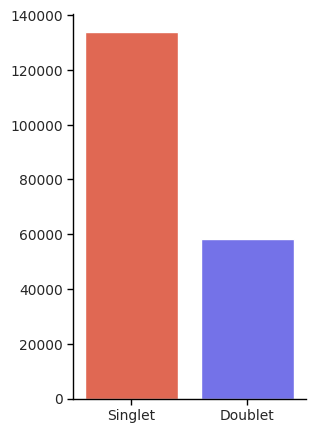

In [35]:
import seaborn as sns

singlet_len = len(singlet_count)
doublet_len = len(doublet_count)
singlet_mix = len(singlet_count[singlet_count["svt_celltype"] > 1])
doublet_mix = len(doublet_count[doublet_count["svt_celltype"] > 1])

# Compute proportions
singlet_prop = singlet_mix / singlet_len
doublet_prop = doublet_mix / doublet_len

# Molandic colors
colors = {
    "Singlet":  "#F7583C",   # Deep blue-purple
    "Doublet": "#615EFC"    # Coral pink
}

# Set up figure and two subplots
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(1, 1, figsize=(3, 5))


# --- Top: Count comparison ---
count_data = pd.DataFrame({
    "Label": ["Singlet", "Doublet"],
    "Count": [singlet_len, doublet_len]
})
sns.barplot(
    data=count_data,
    x="Label",
    y="Count",
    palette=[colors[label] for label in count_data["Label"]],
    ax=ax1
)
ax1.set_ylabel("Total Spot Count", fontsize=5, weight='bold')
ax1.set_xlabel("")
ax1.tick_params(axis='x', labelsize=6)


# Remove legends
for ax in [ax1]:
    if ax.get_legend(): ax.get_legend().remove()
    # Remove grid
    ax.grid(False)

    # Customize spines (axis lines)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add small outward ticks
    ax.tick_params(
        axis='both',
        which='major',
        direction='out',
        length=4,
        width=1,
        color='black',
        bottom=True, top=False, left=True, right=False
    )

    # Add minor ticks if desired
    from matplotlib.ticker import AutoMinorLocator
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(
        which='minor',
        direction='out',
        length=2,
        width=0.8,
        color='black'
    )
    # No x,y labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    # No x tick
    # y ticks: 0, 0.2, 0.4, 0.6, 0.8
    # ax.set_yticks(np.arange(0.4, 0.62, 0.05))
    # Only 1 decimal place
    # ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)
# plt.tight_layout()
plt.show()

In [36]:
add_shapes_rctd_doublet("svt_seg")
add_shapes_rctd_doublet("bin2cell_seg")
add_shapes_rctd_doublet("stardist_seg")

In [37]:
po = sdata_hd.points["svt_seg_center_in_rctd"].compute().copy()
filtered_cell_id = po[f"seg"].value_counts().index[po[f"seg"].value_counts() == 1]

po = po[po[f"seg"].isin(filtered_cell_id)]
adata_st_droplet_svt = adata_st_svt[po.seg.astype("str").tolist()]

po = sdata_hd.points["bin2cell_seg_center_in_rctd"].compute().copy()
filtered_cell_id = po[f"seg"].value_counts().index[po[f"seg"].value_counts() == 1]
po = po[po[f"seg"].isin(filtered_cell_id)]
adata_st_droplet_bin2cell = adata_st_bin2cell[list(set(po.seg.astype("str").tolist()).intersection(set(adata_st_droplet_svt.obs_names)))]

po = sdata_hd.points["stardist_seg_center_in_rctd"].compute().copy()
filtered_cell_id = po[f"seg"].value_counts().index[po[f"seg"].value_counts() == 1]
adata_st_droplet_stardist = adata_st_stardist[list(set(po.seg.astype("str").tolist()).intersection(set(adata_st_stardist.obs_names)))]

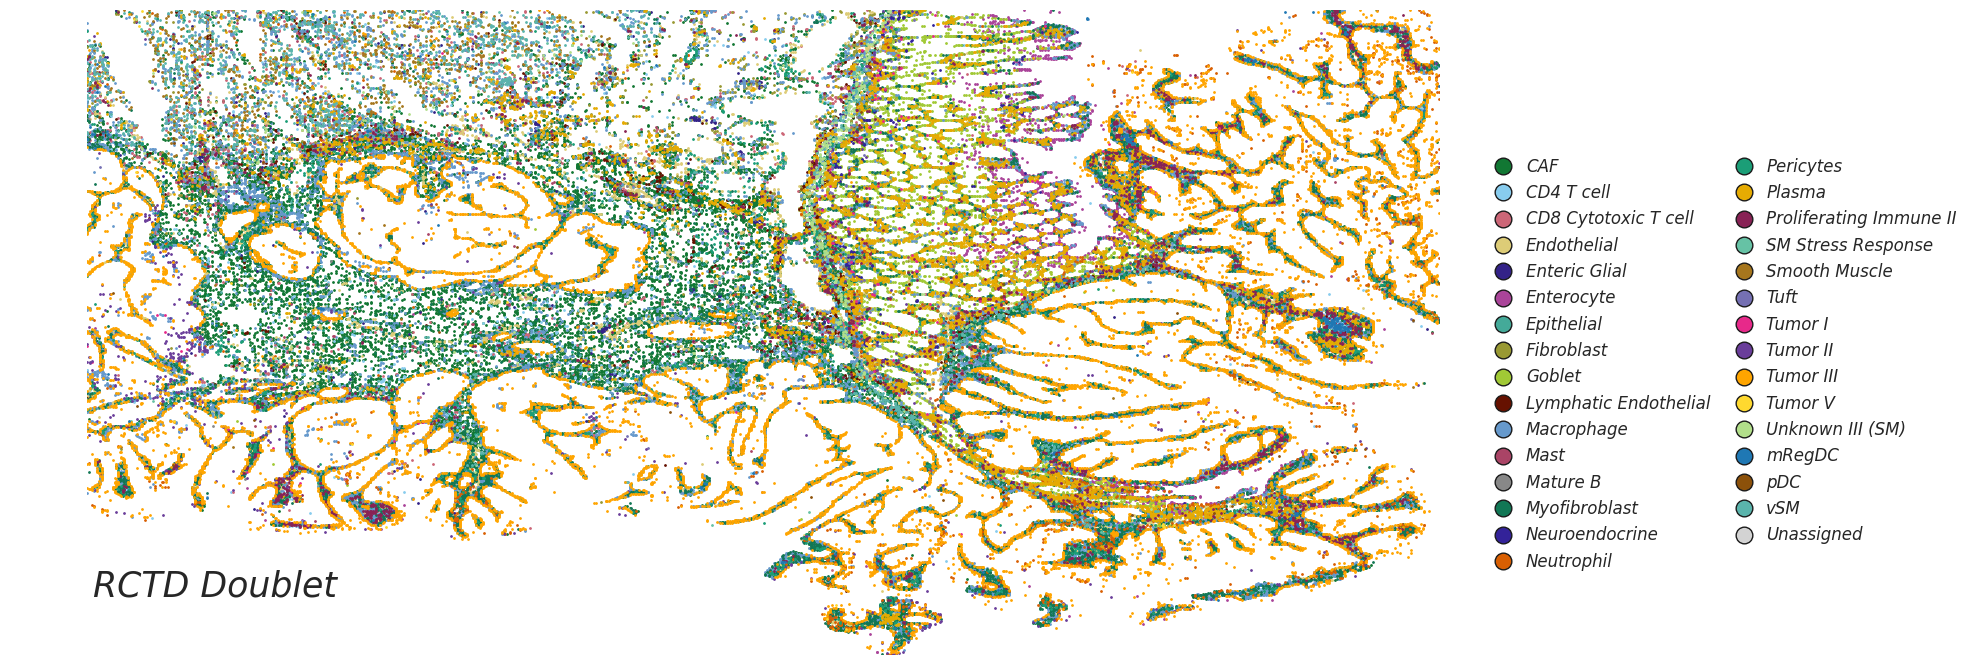

In [42]:
from matplotlib.gridspec import GridSpec

fig, ax = plt.subplots(1, 4, figsize=(20, 8))
gs = GridSpec(1, 4, figure=fig)

for ax_ in ax.flatten():
    fig.delaxes(ax_)

ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3])

rctd_double = sdata_hd.shapes["rctd_square_008um_all"].copy()
rctd_double = rctd_double[rctd_double["rctdtype"] != "singlet"]
celltype_names = list(celltype_mapping.keys())
# selected_celltype = ["Tumor II", "Tumor III", "Tumor V"]
selected_celltype = celltype_names
for i in range(len(celltype_names)):
    # (0,0) is on the top left corner
    if i == 0:
        continue
    if celltype_names[i - 1] not in selected_celltype:
        continue
    sub_df = rctd_double[rctd_double["celltype"] == celltype_names[i - 1]]
    ax1.scatter(sub_df["array_col"], sub_df["array_row"], s=1, label=celltype_names[i - 1], color=celltype_mapping[celltype_names[i - 1]])
# ax1.invert_yaxis()
ax1.axis("off")
ax1.set_xlim(rctd_double["array_col"].min(), rctd_double["array_col"].max())
ax1.set_ylim(rctd_double["array_row"].min(), rctd_double["array_row"].max())
ax1.invert_yaxis()
legend_elements = [Line2D([0], [0], marker= None, color='b', label="RCTD Doublet", linewidth=0,
                      markeredgecolor="#000000", markerfacecolor="#000000", markersize=40)]
ax1.legend(
    handles=legend_elements,
    loc='upper left',               # Align the legend to the upper-left corner
    bbox_to_anchor=(-0.07, 0.18),          # Coordinates for the upper-left corner of ax1
    ncol=1,                         # Number of columns
    handletextpad=0.,               # Spacing between marker and text
    prop={'size': 25, 'style': 'italic'},  # Font size and style
    frameon=False                   # No border for the legend
)

# Add legend elements (example)
legend_elements = [
    Line2D(
        [0], [0],
        marker='o',
        linestyle='None',
        color='w',
        label=label,
        markerfacecolor=color,
        markeredgecolor='k',
        markersize=12
    ) for label, color in celltype_mapping.items()
]

# Add the legend below the entire figure, centered horizontally with [0, 1] subfigures
ax2.legend(
    handles=legend_elements,
    loc='center',                    # Center the legend within the bounding box
    bbox_to_anchor=(0.48, 0.45),       # Center of ax2 (0.5, 0.5 is the middle of the axis)
    ncol=2,                          # Number of columns for the legend
    handletextpad=0.35,               # Spacing between marker and text
    columnspacing=1,               # Spacing between legend columns
    prop={'size': 12, 'style': 'italic'},  # Font size and style
    frameon=False                    # No border for the legend
)

# rect = patches.Rectangle(
#     (2580, 2850),              # (x, y) bottom-left corner
#     190,               # width
#     150,               # height
#     linewidth=3,
#     edgecolor='r',
#     facecolor='none'              # transparent fill
# )
# 
# ax1.add_patch(rect)

ax2.axis("off")  # Hide the axis for ax2
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space for the legend below the plots
plt.show()

# Save
# fig.savefig("/import/home2/yhchenmath/Code/SVTBenchmarking/figure_refined/CRC_figure.png", dpi=300, bbox_inches='tight')

In [54]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.ops import unary_union

x_min, x_max, y_min, y_max = 59550, 61050, 700, 2100
# x_min, x_max, y_min, y_max = 60780, 61180, 1700, 2100
sdata_roi = sdata_hd.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("x", "y"), target_coordinate_system="global"
)
sdata_roi.shapes["svt_seg"]["svt_seg"] = sdata_roi.shapes["svt_seg"]["svt_seg"].astype("str").replace({
    "Unknown III (SM)": "U_III_SM",
}).astype("category")

tmp = sdata_roi.tables["square_002um"]
values = tmp.X.toarray().sum(axis=1)
# Values > 100 set to 100
# values[values > 20] = 20
sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_002um"]["UMI"] = values


ct_col = sdata_roi.points["stardist_seg_center"].svt_celltype.astype("str")
cts = sdata_roi.points["stardist_seg_center"].svt_celltype.unique().compute()
for ct in cts:
    sdata_roi[f"stardist_seg_center_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = sdata_roi.points["stardist_seg_center"][ct_col == ct]


ct_col = sdata_roi.points["svt_seg_center"].celltype.astype("str")
cts = sdata_roi.points["svt_seg_center"].celltype.unique().compute()
for ct in cts:
    sdata_roi[f"svt_seg_center_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = sdata_roi.points["svt_seg_center"][ct_col == ct]

cts = sdata_roi.shapes["rctd_square_008um_all"].celltype.unique().tolist()
ct_col = sdata_roi.shapes["rctd_square_008um_all"].celltype
for ct in cts:
    sdata_roi[f"rctd_square_008um_{ct.replace(' ', '_').replace('(', '').replace(')', '')}_all"] = sdata_roi.shapes["rctd_square_008um_all"][ct_col == ct]

gdf = gpd.GeoDataFrame(columns=['geometry','seg', 'celltype'])

for cell_id in sdata_roi.shapes["svt_seg"]["svt_seg"].unique():
    cell = sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id]
    cell = cell.geometry.tolist()
    merged = unary_union(cell)
    try:
        outer_boundary = merged.exterior
    except:
        continue
    # gdf = gdf.append({'geometry': Polygon(outer_boundary), 'seg': cell_id, 'celltype': sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id].celltype.unique()[0]}, ignore_index=True)
    gdf.loc[len(gdf)] = [Polygon(outer_boundary), cell_id, sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id].celltype.unique()[0]]
gdf = sd.models.ShapesModel.parse(gdf)
sdata_roi.shapes["svt_boundary"] = gdf
sdata_roi.shapes["svt_boundary"]["seg"] = sdata_roi.shapes["svt_boundary"]["seg"].astype("category")
sdata_roi.shapes["svt_boundary"]["celltype"] = sdata_roi.shapes["svt_boundary"]["celltype"].astype("category")

ct_col = sdata_roi.shapes["svt_boundary"].celltype
cts = sdata_roi.shapes["svt_boundary"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"svt_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = sdata_roi.shapes["svt_boundary"][ct_col == ct]

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/geop

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


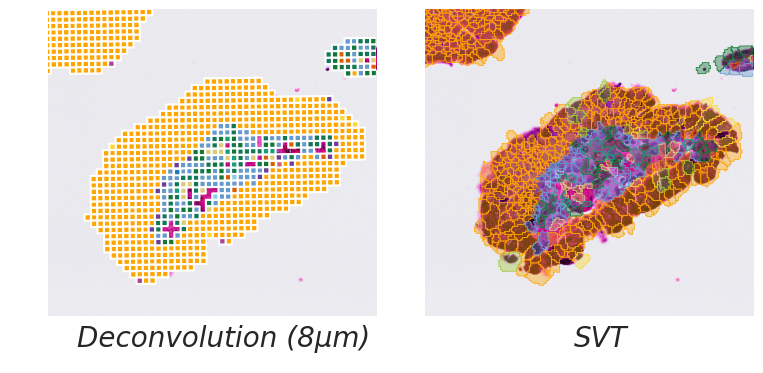

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

draw_cts = sdata_roi.shapes["rctd_square_008um_all"].celltype.unique().tolist()
tmp = sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image")
for ct in draw_cts:
    color = celltype_mapping[ct]
    tmp = tmp.pl.render_shapes(
        f"rctd_square_008um_{ct.replace(' ', '_').replace('(', '').replace(')', '')}_all",
        color=color,
    )
tmp.pl.show(coordinate_systems="global", ax=ax[0], title="", frameon=False, legend_loc='none', return_ax=True)

tmp = sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image")
draw_cts = sdata_roi.shapes["svt_boundary"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping[ct]
    tmp = tmp.pl.render_shapes(
        f"svt_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )

tmp.pl.show(coordinate_systems="global", ax=ax[1], title="", frameon=False, legend_loc='none')

ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)

title = ["Deconvolution (8µm)", "SVT"]
for i in range(2):
    # Axis off
    legend_elements = [Line2D([0], [0], marker= None, color='b', label=title[i], linewidth=0,
                          markeredgecolor="#000000", markerfacecolor="#000000", markersize=20)]
    ax[i].legend(handles=legend_elements, bbox_to_anchor=(0.45,-0.2), loc='lower center', ncol=2, handletextpad=0., prop={'size': 20, 'style': 'italic'}, frameon=False)
    ax[i].axis("off")
plt.tight_layout()


In [58]:
# x_min, x_max, y_min, y_max =47350, 47700, 15600, 15950
# x_min, x_max, y_min, y_max = 47480, 47630, 15630, 15780
x_min, x_max, y_min, y_max = 46200, 46400, 15580, 15800
sdata_roi = sdata_hd.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("x", "y"), target_coordinate_system="global"
)
sdata_roi.shapes["svt_seg"]["svt_seg"] = sdata_roi.shapes["svt_seg"]["svt_seg"].astype("str").replace({
    "Unknown III (SM)": "U_III_SM",
}).astype("category")

sdata_roi.shapes["rctd_square_008um_doublet"] = sdata_roi.shapes["rctd_square_008um_all"][sdata_roi.shapes["rctd_square_008um_all"].rctdtype == "doublet"]
tmp = sdata_roi.tables["square_002um"]
values = tmp.X.toarray().sum(axis=1)
# Values > 100 set to 100
# values[values > 20] = 20
sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_002um"]["UMI"] = values

cts = sdata_roi.shapes["rctd_square_008um_all"].celltype.unique().tolist()
ct_col = sdata_roi.shapes["rctd_square_008um_all"].celltype
for ct in cts:
    sdata_roi[f"rctd_square_008um_{ct.replace(' ', '_').replace('(', '').replace(')', '')}_all"] = sdata_roi.shapes["rctd_square_008um_all"][ct_col == ct]
    
gdf = gpd.GeoDataFrame(columns=['geometry','seg', 'celltype'])
for cell_id in sdata_roi.shapes["svt_seg"]["svt_seg"].unique():
    cell = sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id]
    cell = cell.geometry.tolist()
    merged = unary_union(cell)
    try:
        outer_boundary = merged.exterior
    except:
        continue
    # gdf = gdf.append({'geometry': Polygon(outer_boundary), 'seg': cell_id, 'celltype': sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id].celltype.unique()[0]}, ignore_index=True)
    gdf.loc[len(gdf)] = [Polygon(outer_boundary), cell_id, sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id].celltype.unique()[0]]
gdf = sd.models.ShapesModel.parse(gdf)
sdata_roi.shapes["svt_boundary"] = gdf
sdata_roi.shapes["svt_boundary"]["seg"] = sdata_roi.shapes["svt_boundary"]["seg"].astype("category")
sdata_roi.shapes["svt_boundary"]["celltype"] = sdata_roi.shapes["svt_boundary"]["celltype"].astype("category")

ct_col = sdata_roi.shapes["svt_boundary"].celltype
cts = sdata_roi.shapes["svt_boundary"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"svt_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = sdata_roi.shapes["svt_boundary"][ct_col == ct]

gdf = gpd.GeoDataFrame(columns=['geometry','seg', 'celltype'])

for cell_id in sdata_roi.shapes["stardist_seg"]["stardist_seg"].unique():
    cell = sdata_roi.shapes["stardist_seg"][sdata_roi.shapes["stardist_seg"]["stardist_seg"] == cell_id]
    cell = cell.geometry.tolist()
    merged = unary_union(cell)
    try:
        outer_boundary = merged.exterior
    except:
        continue
    # gdf = gdf.append({'geometry': Polygon(outer_boundary), 'seg': cell_id, 'celltype': sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id].celltype.unique()[0]}, ignore_index=True)
    gdf.loc[len(gdf)] = [Polygon(outer_boundary), cell_id, sdata_roi.shapes["stardist_seg"][sdata_roi.shapes["stardist_seg"]["stardist_seg"] == cell_id].celltype.unique()[0]]
gdf = sd.models.ShapesModel.parse(gdf)
sdata_roi.shapes["stardist_boundary"] = gdf
sdata_roi.shapes["stardist_boundary"]["seg"] = sdata_roi.shapes["stardist_boundary"]["seg"].astype("category")
sdata_roi.shapes["stardist_boundary"]["celltype"] = sdata_roi.shapes["stardist_boundary"]["celltype"].astype("category")

ct_col = sdata_roi.shapes["stardist_boundary"].celltype
cts = sdata_roi.shapes["stardist_boundary"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"stardist_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = sdata_roi.shapes["stardist_boundary"][ct_col == ct]

sdata_roi.shapes["stardist_seg"]["stardist_seg"] = sdata_roi.shapes["stardist_seg"]["stardist_seg"].astype("str").replace({
    "Unknown III (SM)": "U_III_SM",
}).astype("category")

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/geop

In [59]:
ct_col = sdata_roi.points["svt_seg_center"].celltype.astype("str")
cts = sdata_roi.points["svt_seg_center"].celltype.unique().compute()
for ct in cts:
    sdata_roi[f"svt_seg_center_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = sdata_roi.points["svt_seg_center"][ct_col == ct]

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `svt_seg_center_Macrophage` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata_plot/pl/render.py:594: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = ax.scatt

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


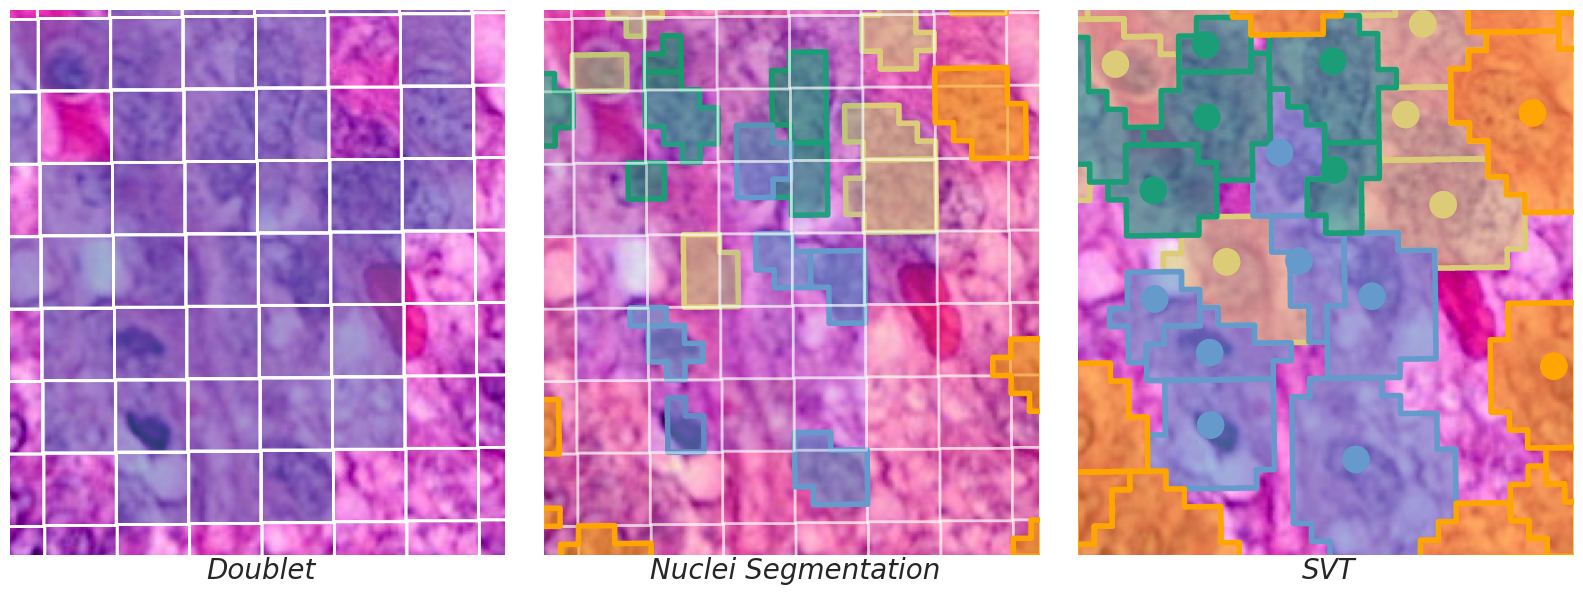

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

draw_cts = sdata_roi.shapes["rctd_square_008um_all"].celltype.unique().tolist()
tmp = sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image")
for ct in draw_cts:
    color = celltype_mapping[ct]
    tmp = tmp.pl.render_shapes(
        f"rctd_square_008um_{ct.replace(' ', '_').replace('(', '').replace(')', '')}_all",
        color=color, fill_alpha=0, outline_width=2, outline_color = "w", outline_alpha=1
    )
tmp.pl.show(coordinate_systems="global", ax=ax[0], title="", frameon=False, legend_loc='none', return_ax=True)


sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image").pl.render_shapes(
        f"rctd_square_008um_doublet",
        color="b", fill_alpha= 0.5, outline_width=2
    ).pl.show(coordinate_systems="global", ax=ax[0], title="", frameon=False, legend_loc='none')


tmp = sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image")
draw_cts = sdata_roi.shapes["svt_boundary"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping[ct]
    tmp = tmp.pl.render_shapes(
        f"svt_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}",
        color=color, fill_alpha=0.6, outline_width=4, outline_color = color, outline_alpha=1
    )


m= "svt_seg"
draw_cts = sdata_roi.points[f"{m}_center"].celltype.compute().unique().tolist()
for ct in draw_cts:
    color = celltype_mapping[ct]
    tmp = tmp.pl.render_points(
        f"{m}_center_{ct.replace(' ', '_').replace('(', '').replace(')', '')}",
        color=color, size=350
    )
tmp.pl.show(coordinate_systems="global", ax=ax[2], title="", frameon=False, legend_loc='none')
tmp = sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image")
draw_cts = sdata_roi.shapes["stardist_boundary"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping[ct]
    tmp = tmp.pl.render_shapes(
        f"stardist_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}",
        color=color, fill_alpha=0.6, outline_width=4, outline_color = color, outline_alpha=1
    ) # "#AFC7E8"
tmp.pl.show(coordinate_systems="global", ax=ax[1], legend_loc = "none", title="", frameon=False)




draw_cts = sdata_roi.shapes["rctd_square_008um_all"].celltype.unique().tolist()
tmp = sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image")
for ct in draw_cts:
    color = celltype_mapping[ct]
    tmp = tmp.pl.render_shapes(
        f"rctd_square_008um_{ct.replace(' ', '_').replace('(', '').replace(')', '')}_all",
        color=color, fill_alpha=0.15, outline_width=2, outline_color = "w", outline_alpha=0.45
    )
tmp.pl.show(coordinate_systems="global", ax=ax[1], title="", frameon=False, legend_loc='none', return_ax=True)

# ax[3].set_xlim(x_min_, x_max_)
# ax[3].set_ylim(y_min_, y_max_)

ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)

ax[2].set_xlim(x_min, x_max)
ax[2].set_ylim(y_min, y_max)

title = ["Doublet", "Nuclei Segmentation", "SVT"]
for i in range(3):
    # Axis off
    legend_elements = [Line2D([0], [0], marker= None, color='b', label=title[i], linewidth=0,
                          markeredgecolor="#000000", markerfacecolor="#000000", markersize=20)]
    ax[i].legend(handles=legend_elements, bbox_to_anchor=(0.45,-0.1), loc='lower center', ncol=2, handletextpad=0., prop={'size': 20, 'style': 'italic'}, frameon=False)
    ax[i].axis("off")
plt.tight_layout()

In [61]:
def find_markers(
    adata,
    cell_type_column: str,
    pos_percentile: float = 5,
    neg_percentile: float = 10,
    percentage: float = 50,
):
    """
    Identify positive and negative markers for each cell type based on gene expression.

    Parameters:
    ----------
    adata : AnnData
        Annotated data object containing gene expression data.
    cell_type_column : str
        Column name in `adata.obs` specifying cell types.
    pos_percentile : float, default=5
        Top x% of highly expressed genes to consider as markers.
    neg_percentile : float, default=10
        Bottom x% of lowly expressed genes to consider.
    percentage : float, default=50
        Minimum percentage of cells within a type that must express a marker.

    Returns:
    -------
    Dict[str, Dict[str, List[str]]]
        Dictionary mapping cell types to lists of positive and negative marker genes.
    """
    markers = {}
    adata.raw = adata  # Ensure raw expression values are used
    adata.var_names_make_unique()

    sc.tl.rank_genes_groups(adata, groupby=cell_type_column)

    genes = adata.var_names
    for cell_type in adata.obs[cell_type_column].unique():
        subset = adata[adata.obs[cell_type_column] == cell_type]
        mean_expression = np.asarray(subset.X.mean(axis=0)).flatten()

        # Compute percentile cutoffs
        cutoff_high = np.percentile(mean_expression, 100 - pos_percentile)
        cutoff_low = np.percentile(mean_expression, neg_percentile)

        pos_indices = np.where(mean_expression >= cutoff_high)[0]
        neg_indices = np.where(mean_expression <= cutoff_low)[0]

        # Filter positive markers based on expression percentage
        expr_frac = np.asarray((subset.X[:, pos_indices] > 0).mean(axis=0)).flatten()
        valid_pos_indices = pos_indices[expr_frac >= (percentage / 100)]

        markers[cell_type] = {
            "positive": genes[valid_pos_indices].tolist(),
            "negative": genes[neg_indices].tolist(),
        }

    return markers

def calculate_sensitivity(
    adata, purified_markers, max_cells_per_type: int = 1000
):
    """
    Calculate sensitivity of purified markers for each cell type.

    Parameters:
    ----------
    adata : AnnData
        Annotated data object containing gene expression data.
    purified_markers : Dict[str, Dict[str, List[str]]]
        Dictionary mapping cell types to positive and negative markers.
    max_cells_per_type : int, default=1000
        Maximum number of cells to consider per cell type.

    Returns:
    -------
    Dict[str, List[float]]
        Sensitivity values for each cell type.
    """
    sensitivity_results = {cell_type: [] for cell_type in purified_markers.keys()}

    subset_index = []
    for cell_type, markers in purified_markers.items():
        positive_markers = markers["positive"]
        subset = adata[adata.obs["celltype"] == cell_type]


        if subset.n_obs > max_cells_per_type:
            cell_indices = np.random.choice(subset.n_obs, max_cells_per_type, replace=False)
            subset = subset[cell_indices]
            subset_index.extend(subset.obs_names.tolist())
        else:
            subset_index.extend(subset.obs_names.tolist())

        for cell_counts in subset.X:
            # if sparse, convert to dense
            if hasattr(cell_counts, "toarray"):
                cell_counts = cell_counts.toarray().flatten()
            # print(cell_counts)
            positive_indices = subset.var_names.get_indexer(positive_markers)
            total_counts = cell_counts.sum()

            positive_counts = cell_counts[positive_indices].sum() if positive_markers else 0

            sensitivity = positive_counts / total_counts if total_counts > 0 else 0
            sensitivity_results[cell_type].append(sensitivity)

    return sensitivity_results, subset_index

In [63]:
with open("/import/home2/yhchenmath/Code/Triplet/Data/VisiumHD_P2_CRC/filtered_gene_names.txt") as f:
    gene_names = f.read().splitlines()

sdata_hd.tables["rctd_008um_all"].var_names_make_unique()
sdata_hd.tables["rctd_008um_doublet"] = sdata_hd.tables["rctd_008um_all"][sdata_hd.tables["rctd_008um_all"].obs["rctdtype"] == "doublet"].copy()
adata_st_droplet_svt.obs["UMI"] = adata_st_droplet_svt.X.sum(axis=1)
adata_st_droplet_bin2cell.obs["UMI"] = adata_st_droplet_bin2cell.X.sum(axis=1)
adata_st_droplet_stardist.obs["UMI"] = adata_st_droplet_stardist.X.sum(axis=1)

/tmp/ipykernel_1031590/3248259206.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_st_droplet_svt.obs["UMI"] = adata_st_droplet_svt.X.sum(axis=1)
/tmp/ipykernel_1031590/3248259206.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_st_droplet_bin2cell.obs["UMI"] = adata_st_droplet_bin2cell.X.sum(axis=1)
/tmp/ipykernel_1031590/3248259206.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_st_droplet_stardist.obs["UMI"] = adata_st_droplet_stardist.X.sum(axis=1)


In [64]:
# Filtered umi of adata_st_svt
adata_tmp_svt = adata_st_droplet_svt.copy()
sc.pp.filter_cells(adata_tmp_svt, min_counts=100)

adata_tmp_bin2cell = adata_st_droplet_bin2cell.copy()
adata_tmp_bin2cell = adata_tmp_bin2cell[:, gene_names]
sc.pp.filter_cells(adata_tmp_bin2cell, min_counts=100)

adata_tmp_stardist = adata_st_droplet_stardist.copy()
adata_tmp_stardist = adata_tmp_stardist[:, gene_names]
sc.pp.filter_cells(adata_tmp_stardist, min_counts=100)

adata_tmp_rctd = sdata_hd.tables["rctd_008um_doublet"][:, gene_names].copy()
sc.pp.filter_cells(adata_tmp_rctd, min_counts=100)

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:165: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:165: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number


In [65]:
# SC: celltype in selected_celltype
sc_adata = sc.read("/import/home3/yhchenmath/Dataset/DeconvSeg/CRC/scRNA_ref/adata_sc_p2.h5ad")
sc_adata.var_names_make_unique()
# sc_adata = sc_adata[sc_adata.obs["celltype"].isin(selected_celltype)]
purified_markers = find_markers(sc_adata[:, gene_names], "celltype", neg_percentile=10, percentage=50, pos_percentile=10)

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:

In [102]:
sensitivity_results_svt, subset_svt = calculate_sensitivity(adata_tmp_svt, purified_markers, max_cells_per_type=2000)
sensitivity_results_rctd, subset_rctd = calculate_sensitivity(adata_tmp_rctd, purified_markers, max_cells_per_type=2000)
sensitivity_results_bin2cell, subset_bin2cell = calculate_sensitivity(adata_tmp_bin2cell, purified_markers, max_cells_per_type=2000)
sensitivity_results_stardist, subset_stardist = calculate_sensitivity(adata_tmp_stardist, purified_markers, max_cells_per_type=2000)

In [103]:
sensitivity_results_svt = {k: v for k, v in sensitivity_results_svt.items() if len(v) > 0}
sensitivity_results_rctd = {k: v for k, v in sensitivity_results_rctd.items() if len(v) > 0}
sensitivity_results_bin2cell = {k: v for k, v in sensitivity_results_bin2cell.items() if len(v) > 0}
sensitivity_results_stardist = {k: v for k, v in sensitivity_results_stardist.items() if len(v) > 0}

In [104]:
sensitivity_boxplot_data = []
sensitivity_results_per_method = {
    "SVT": sensitivity_results_svt,
    "RCTD": sensitivity_results_rctd,
    "Bin2Cell": sensitivity_results_bin2cell,
    "StarDist": sensitivity_results_stardist,
}
for method, sensitivity_results in sensitivity_results_per_method.items():
    for cell_type, sensitivities in sensitivity_results.items():
        method_df = pd.DataFrame({"Cell Type": cell_type, "Sensitivity": sensitivities, "Segmentation Method": method})
        sensitivity_boxplot_data.append(method_df)

# Concatenate all sensitivity dataframes into one
sensitivity_boxplot_data = pd.concat(sensitivity_boxplot_data)

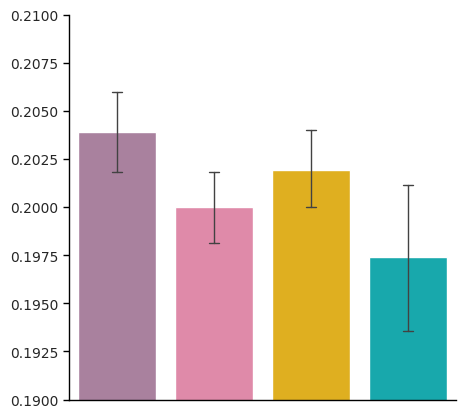

In [105]:
method_colors = {
    "SVT": '#B07AA1',
    "RCTD": '#ED7CA5',
    "Bin2Cell": '#FFBF00',
    "StarDist": '#00BFC4'
}

# No warning
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Plot
sns.barplot(
    data=sensitivity_boxplot_data,
    x="Segmentation Method",
    y="Sensitivity",
    hue="Segmentation Method",
    estimator=np.median,
    # errorbar=('pi', 10),
    capsize=0.1,
    palette=method_colors,
    ax=ax,
    err_kws={"linewidth": 1}
)

# Axis labels and limits
ax.set_ylabel('Positive marker purity', fontsize=15)
ax.set_xlabel('')
ax.set(ylim=(0.18, 0.22))

# Rotate x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove grid
ax.grid(False)

# Customize spines (axis lines)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add small outward ticks
ax.tick_params(
    axis='both',
    which='major',
    direction='out',
    length=4,
    width=1,
    color='black',
    bottom=True, top=False, left=True, right=False
)

# Add minor ticks if desired
from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(
    which='minor',
    direction='out',
    length=2,
    width=0.8,
    color='black'
)

# Remove legend (since color is same as x)
# ax.get_legend().remove()

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(0.190, 0.210)
# No x tick
ax.set_xticks([])
# y ticks: 0, 0.2, 0.4, 0.6, 0.8
# ax.set_yticks(np.arange(0.4, 0.62, 0.05))
# Only 1 decimal place
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
ax.tick_params(axis='y', labelsize=10)

# Show plot
plt.show()

In [106]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score

def compute_clustering_scores(
    adata, cell_type_column: str = "celltype", use_pca: bool = True
):
    """
    Compute the Calinski-Harabasz and Silhouette scores for clustering in an AnnData object.

    Parameters:
    ----------
    adata : AnnData
        Annotated data object with clustering data.
    cell_type_column : str, default="celltype_major"
        Column in `adata.obs` containing cell type annotations.
    use_pca : bool, default=True
        Whether to use PCA-transformed features or raw expression data.

    Returns:
    -------
    Tuple[float, float]
        Calinski-Harabasz score and Silhouette score.
    """
    if cell_type_column not in adata.obs:
        raise ValueError(f"Column '{cell_type_column}' must be present in adata.obs.")

    # Sample up to 10,000 cells for efficiency
    n_cells = adata.n_obs # min(adata.n_obs, 20_000)
    cell_indices = np.random.choice(adata.n_obs, n_cells, replace=False)

    # Select features
    features = adata.obsm["X_pca"] if use_pca else adata.X
    features = features[cell_indices, :]
    labels = adata.obs[cell_type_column].iloc[cell_indices].values

    # Compute scores
    ch_score = calinski_harabasz_score(features, labels)
    sh_score = silhouette_score(features, labels)

    return ch_score, sh_score

In [107]:
adata_cluster_svt = adata_tmp_svt.copy()[subset_svt]
sc.pp.normalize_total(adata_cluster_svt, target_sum=1e3)
sc.pp.log1p(adata_cluster_svt)
sc.pp.pca(adata_cluster_svt, n_comps=30)
ch_score, sh_score = compute_clustering_scores(adata_cluster_svt, cell_type_column='celltype', use_pca=True)

adata_cluster_rctd = adata_tmp_rctd.copy()[subset_rctd]
sc.pp.normalize_total(adata_cluster_rctd, target_sum=1e3)
sc.pp.log1p(adata_cluster_rctd)
sc.pp.pca(adata_cluster_rctd, n_comps=30)

ch_score_rctd, sh_score_rctd = compute_clustering_scores(adata_cluster_rctd, cell_type_column='celltype', use_pca=True)

adata_cluster_bin2cell = adata_tmp_bin2cell.copy()[subset_bin2cell]
sc.pp.normalize_total(adata_cluster_bin2cell, target_sum=1e3)
sc.pp.log1p(adata_cluster_bin2cell)
sc.pp.pca(adata_cluster_bin2cell, n_comps=30)

ch_score_bin2cell, sh_score_bin2cell = compute_clustering_scores(adata_cluster_bin2cell, cell_type_column='celltype', use_pca=True)

adata_cluster_stardist = adata_tmp_stardist.copy()[subset_stardist]
sc.pp.normalize_total(adata_cluster_stardist, target_sum=1e3)
sc.pp.log1p(adata_cluster_stardist)
sc.pp.pca(adata_cluster_stardist, n_comps=30)

ch_score_stardist, sh_score_stardist = compute_clustering_scores(adata_cluster_stardist, cell_type_column='celltype', use_pca=True)

In [108]:
# h_score, sh_score, ch_score_rctd, sh_score_rctd, ch_score_bin2cell, sh_score_bin2cell, ch_score_stardist, sh_score_stardist
# Beautiful show
df_ch = pd.DataFrame({
    "Segmentation Method": ["SVT", "RCTD", "Bin2Cell", "StarDist"],
    "Values": [ch_score, ch_score_rctd, ch_score_bin2cell, ch_score_stardist],
})

df_sh = pd.DataFrame({
    "Segmentation Method": ["SVT", "RCTD", "Bin2Cell", "StarDist"],
    "Values": [sh_score, sh_score_rctd, sh_score_bin2cell, sh_score_stardist],
})

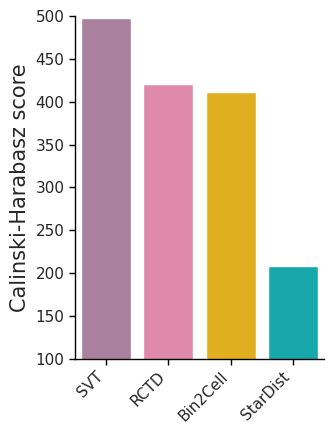

In [109]:
method_colors = {
    "SVT": '#B07AA1',
    "RCTD": '#ED7CA5',
    "Bin2Cell": '#FFBF00',
    "StarDist": '#00BFC4'
}

# No warning
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 1, figsize=(3.5, 4.5))
# Plot
sns.barplot(
    data=df_ch,
    x="Segmentation Method",
    y="Values",
    hue="Segmentation Method",
    capsize=0.1,
    palette=method_colors,
    ax=ax,
    err_kws={"linewidth": 1}
)

# Axis labels and limits
ax.set_ylabel('Calinski-Harabasz score', fontsize=15)
ax.set_xlabel('')
ax.set(ylim=(100, 500))

# Rotate x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove grid
ax.grid(False)

# Customize spines (axis lines)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add small outward ticks
ax.tick_params(
    axis='both',
    which='major',
    direction='out',
    length=4,
    width=1,
    color='black',
    bottom=True, top=False, left=True, right=False
)

# Add minor ticks if desired
from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(
    which='minor',
    direction='out',
    length=2,
    width=0.8,
    color='black'
)

# Remove legend (since color is same as x)
# ax.get_legend().remove()

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

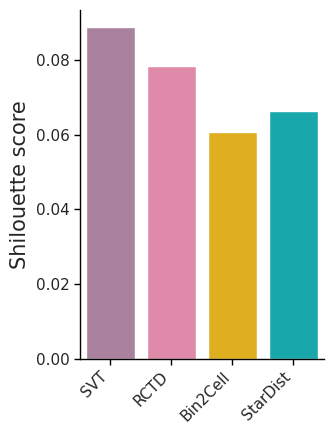

In [111]:
method_colors = {
    "SVT": '#B07AA1',
    "RCTD": '#ED7CA5',
    "Bin2Cell": '#FFBF00',
    "StarDist": '#00BFC4'
}

# No warning
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 1, figsize=(3.5, 4.5))
# Plot
df_sh["Values_plus"] = df_sh["Values"] + 0.1
sns.barplot(
    data=df_sh,
    x="Segmentation Method",
    y="Values_plus",
    hue="Segmentation Method",
    capsize=0.1,
    palette=method_colors,
    ax=ax,
    err_kws={"linewidth": 1}
)

# Axis labels and limits
ax.set_ylabel('Shilouette score', fontsize=15)
ax.set_xlabel('')
# ax.set(ylim=(-0.1, 0))

# Rotate x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Remove grid
ax.grid(False)

# Customize spines (axis lines)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add small outward ticks
ax.tick_params(
    axis='both',
    which='major',
    direction='out',
    length=4,
    width=1,
    color='black',
    bottom=True, top=False, left=True, right=False
)

# Add minor ticks if desired
from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(
    which='minor',
    direction='out',
    length=2,
    width=0.8,
    color='black'
)

# Remove legend (since color is same as x)
# ax.get_legend().remove()

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

### Differential genes and GO analysis of RCTD and CellART (macrophages)

In [112]:
import pydeseq2
pydeseq2.__version__

'0.4.12'

In [113]:
from scipy.spatial import Rectangle
import shapely
import numpy as np
import math


class NDTree:
    """
    NDTree is a data structure for recursively splitting multi-dimensional data
    into smaller regions until each leaf node contains less than or equal to a
    specified number of points. It stores these regions in a balanced binary
    tree.

    Attributes
    ----------
    data : np.ndarray
        The input data to be partitioned.
    n : int
        The maximum number of points allowed in a leaf node.
    idx : np.ndarray
        The indices of the input data points.
    boxes : list
        A list to store the bounding boxes (as shapely polygons) of each region
        in the tree.
    rect : Rectangle
        The bounding box of the entire input data space.
    tree : innernode
        The root of the NDTree.
    """

    def __init__(self, data, n):
        """
        Initializes the NDTree with the given data and maximum points per leaf
        node.

        Parameters
        ----------
        data : np.ndarray
            The input data to be partitioned.
        n : int
            The maximum number of points allowed in a leaf node.
        """
        self.data = np.asarray(data)
        self.n = n
        self.idx = np.arange(data.shape[0])
        self.boxes = []
        self.rect = Rectangle(data.min(0), data.max(0))
        self.tree = innernode(self.n, self.idx, self.rect, self)


class innernode:
    """
    Represents a node in the NDTree. Each node either stores a bounding box for
    the data it contains (leaf nodes) or splits the data into two child nodes.

    Attributes
    ----------
    n : int
        The maximum number of points allowed in a leaf node for this subtree.
    idx : np.ndarray
        The indices of the data points in this node.
    tree : NDTree
        The reference to the main NDTree that holds the data and bounding boxes.
    rect : Rectangle
        The bounding box of the data points in this node.
    split_dim : int
        The dimension along which the node splits the data.
    split_point : float
        The value along the split dimension used to divide the data.
    less : innernode
        The child node containing data points less than or equal to the split
        point.
    greater : innernode
        The child node containing data points greater than the split point.
    """

    def __init__(self, n, idx, rect, tree):
        """
        Initializes the innernode and splits the data if necessary.
        """
        self.n = n
        self.idx = idx
        self.tree = tree
        self.rect = rect
        if not n == 1:
            self.split()
        else:
            box = shapely.box(*self.rect.mins, *self.rect.maxes)
            self.tree.boxes.append(box)

    def split(self):
        """
        Recursively splits the node's data into two child nodes along the
        dimension with the largest spread.
        """
        less = math.floor(self.n // 2)
        greater = self.n - less
        data = self.tree.data[self.idx]
        self.split_dim = np.argmax(self.rect.maxes - self.rect.mins)
        data = data[:, self.split_dim]
        self.split_point = np.quantile(data, less / (less + greater))
        mask = data <= self.split_point
        less_rect, greater_rect = self.rect.split(self.split_dim, self.split_point)
        self.less = innernode(less, self.idx[mask], less_rect, self.tree)
        self.greater = innernode(greater, self.idx[~mask], greater_rect, self.tree)

In [114]:
# adata_st_svt
sdata_hd.tables["rctd_008um_all"].var_names_make_unique()
adata_st_rctd_de = sdata_hd.tables["rctd_008um_all"][:, gene_names].copy()
adata_st_svt_de = adata_st_svt.copy()

mask = adata_st_svt_de.obs['celltype'].eq('Macrophage')
adata_st_svt_de = adata_st_svt_de[mask]

mask = adata_st_rctd_de.obs['celltype'].eq('Macrophage')
adata_st_rctd_de = adata_st_rctd_de[mask]

# Filter umi and gene
sc.pp.filter_cells(adata_st_svt_de, min_counts=100)
sc.pp.filter_cells(adata_st_rctd_de, min_counts=100)


adata_st_rctd_de.obs_names_make_unique()
adata_st_svt_de.obs_names_make_unique()
adata_st_rctd_de.var_names_make_unique()
adata_st_svt_de.var_names_make_unique()

In [ ]:
# Pseudobulk in space
n = 20

df = pd.DataFrame(
    adata_st_svt_de.X,
    index=adata_st_svt_de.obs.index,
    columns=adata_st_svt_de.var.index
)

centroids = pd.DataFrame(
    index=adata_st_svt_de.obs.index
)
centroids["x"] = adata_st_svt_de.obs["array_row"]
centroids["y"] = adata_st_svt_de.obs["array_col"]

groups = pd.Series(-1, index=centroids.index)
for i, box in enumerate(NDTree(centroids.values, n).boxes):
    xmin, ymin, xmax, ymax = box.bounds
    mask = centroids.x.between(xmin, xmax) & centroids.y.between(ymin, ymax)
    groups[mask] = i

counts_svt = df.groupby(groups).sum()
counts_svt.index = np.arange(counts_svt.shape[0])

# Pseudobulk in space
df = pd.DataFrame(
    adata_st_rctd_de.X.todense(),
    index=adata_st_rctd_de.obs.index,
    columns=adata_st_rctd_de.var.index
)
centroids = pd.DataFrame(
    index=adata_st_rctd_de.obs.index
)
centroids["x"] = adata_st_rctd_de.obs["array_row"]
centroids["y"] = adata_st_rctd_de.obs["array_col"]

groups = pd.Series(-1, index=centroids.index)
for i, box in enumerate(NDTree(centroids.values, n).boxes):
    xmin, ymin, xmax, ymax = box.bounds
    mask = centroids.x.between(xmin, xmax) & centroids.y.between(ymin, ymax)
    groups[mask] = i
counts_rctd = df.groupby(groups).sum()
counts_rctd.index = np.arange(counts_rctd.shape[0])

# Save
counts_svt.to_csv("bulk_counts_svt.csv")
counts_rctd.to_csv("bulk_counts_rctd.csv")

# Python 3.10, run outsize
#    from pydeseq2.dds import DeseqDataSet
#    from pydeseq2.default_inference import DefaultInference
#    from pydeseq2.ds import DeseqStats
# counts_svt = pd.read_csv("/import/home2/yhchenmath/Code/SVTBenchmarking/figure_refined/bulk_counts_svt.csv", index_col=0)
# counts_rctd = pd.read_csv("/import/home2/yhchenmath/Code/SVTBenchmarking/figure_refined/bulk_counts_rctd.csv", index_col=0)
# counts = pd.concat([counts_svt, counts_rctd])
# metadata = pd.DataFrame(
#     ['SVT'] * counts_svt.shape[0] + ['RCTD'] * counts_rctd.shape[0],
#     index=counts.index,
#     columns=['Segmentation']
# )
# inference = DefaultInference(n_cpus=16)
# dds = DeseqDataSet(
#     counts=counts,
#     metadata=metadata,
#     design_factors="Segmentation",
#     refit_cooks=True,
#     inference=inference, # n_cpus can be specified here or in the inference object
#     quiet=True,
# )
# dds.deseq2()
# stat_res = DeseqStats(dds, contrast = ["Segmentation", "SVT", "RCTD"])
# stat_res.summary()
# summary = stat_res.results_df

In [116]:
summary = pd.read_csv("/import/home2/yhchenmath/Code/SVTBenchmarking/figure_refined/summary_de.csv", index_col=0)

In [117]:
sc_adata.var_names_make_unique()
markers = find_markers(sc_adata[:, gene_names], "celltype", neg_percentile=10, percentage=50, pos_percentile=10)

In [118]:
summary["label"] = "Unassigned"
cancer_related_ct = ["Tumor III", "Tumor V", "Tumor II", "CAF"]
immune_related_ct = ["CD4 T cell", "CD8 Cytotoxic T cell", "Mature B", "Proliferating Immune II", "Macrophage"]
# ["Macrophage", "Tumor III", "Tumor V", "Tumor II", "CAF", "CD4 T Cell", "CD8 Cytotoxic T Cell", "Mature B", "Proliferating Immune II"]:
for k in cancer_related_ct:
    for g in markers[k]['positive']:
        summary.loc[g, "label"] = k

for k in immune_related_ct:
    for g in markers[k]['positive']:
        summary.loc[g, "label"] = k

data = summary

x = 'log2FoldChange'
y = 'padj'
hue = 'label'

logfc_min = 0.1
pval_min = 0.05
named_genes = data.index[~data[x].between(-0.1, 0.1) & data[y].lt(0.05)]

In [119]:
data_temp = data.copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


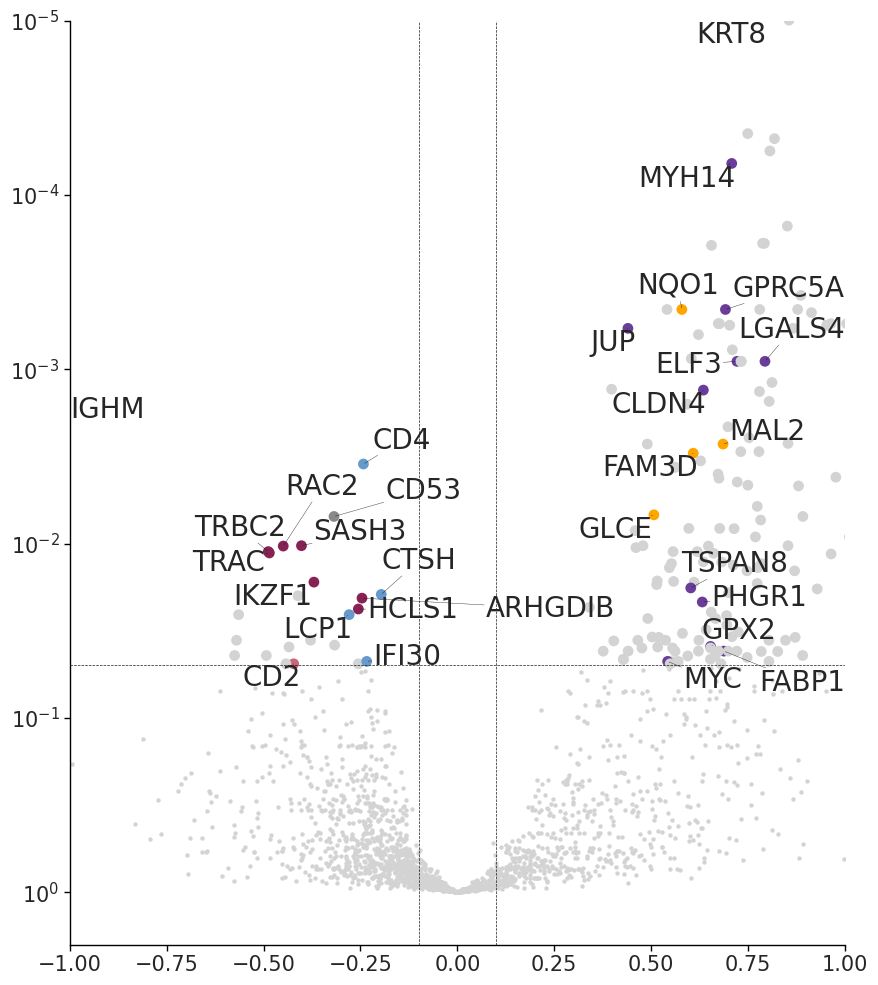

In [121]:
from adjustText import adjust_text

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

legend_order = [
    "Macrophage",
    "Mature B",
    "CD8 Cytotoxic T cell",
    "Proliferating Immune II",
    "Tumor II",
    "Tumor III"
]

significant = (
    ~data_temp[x].between(-logfc_min, logfc_min) &
    data_temp[y].lt(pval_min)
)

# Scatters
sns.scatterplot(
    data=data_temp[~significant], x=x, y=y,
    s=10,
    lw=0,
    legend=False,
    color='lightgray',
)
sns.scatterplot(
    data=data_temp[significant], x=x, y=y, hue=hue,
    palette=celltype_mapping,
    hue_order=legend_order,
    s=60,
    lw=0,
    legend=False,
)

# Vlines
styles = dict(lw=0.5, linestyle='--', color='k')
h1 = ax.axhline(pval_min, **styles)
v1 = ax.axvline(-logfc_min, **styles)
v2 = ax.axvline(logfc_min, **styles)
objects = [h1, v1, v2]

# Named genes
texts = []
for gene in list(data_temp[data_temp["label"] != "Unassigned"].index):
    if gene in summary[significant].index:
        row = summary.loc[gene]
        styles = dict(ha='center', va='center', size=20)
        t = ax.text(row[x], row[y], gene, **styles)
        texts.append(t)

# Formatting
ax.set_ylim(2e0, 1e-5)
ax.set_yscale('log')
ax.set_xlim(-1,1)

# Remove grid
ax.grid(False)
ax.legend().set_bbox_to_anchor((-0.25, 1))
ax.legend().set_frame_on(False)
# Customize spines (axis lines)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add small outward ticks
ax.tick_params(
    axis='both',
    which='major',
    direction='out',
    length=4,
    width=1,
    color='black',
    bottom=True, top=False, left=True, right=False
)

# Add minor ticks if desired
from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(
    which='minor',
    direction='out',
    length=2,
    width=0.8,
    color='black'
)
#
#
adjust_text(
    texts,
    objects=objects,
    force_text=(0.25, 0.5),
    force_explode=(0.125, 0.25),
    min_arrow_len=0,
    expand=(1.1, 1.1),
    arrowprops={'color':'k', 'lw':0.05, 'shrinkB':1, 'shrinkA':1}
)
# Axis labels
ax.set_xlabel(f"", fontsize=20)
ax.set_ylabel(f"", fontsize=20)
# Tick
ax.tick_params(axis='both', labelsize=15)

In [122]:
# For GO
for g in list(data[significant][data["log2FoldChange"] < 0].index):
    # Print without \n but a space
    print(g, end=' ')

CD53 CD2 CD48 PTPN7 ZAP70 ICOS CXCR6 HCLS1 MYO1G IKZF1 TRBC2 FAM107B SPOCK2 TBC1D10C CD4 ARHGDIB LCP1 TRAC IGHG3 IGHM CTSH ABI3 IFI30 RAC2 SASH3 

In [124]:
for g in list(data[significant][data["log2FoldChange"] > 0].index):
    # Print without \n but a space
    print(g, end=' ')

SFN PDZK1IP1 TTC39A DHCR24 PCSK9 CYP2J2 VAV3 EPS8L3 S100A16 RAB25 INAVA LAD1 ELF3 PLEKHA6 PROX1 LEFTY1 KCNK1 TRABD2A FABP1 TFCP2L1 MYO7B GALNT3 SP5 HOXD11 HOXD10 SATB2 VIL1 PID1 FAM3D IFT57 HHLA2 MUC13 PODXL2 PLS1 LIPH C4orf19 EREG SHROOM3 CMBL AMACR SLC12A2 PRELID2 SH3RF2 ATP10B DSP LY6G6D SLC44A4 PTK7 SH3BGRL2 MYB MAP7 PERP ICA1 TSPAN13 HOXA10 CLDN3 CLDN4 RRS1 ESRP1 GRHL2 MAL2 MYC TOP1MT EPPK1 PGM5 EPB41L4B BSPRY NET1 PRAP1 PKP3 MUC5B ASCL2 RASSF10 EHF CCND1 STARD10 CAPN5 TMPRSS4 VSIG2 TMEM45B PLEKHG6 SCNN1A GPRC5A GUCY2C EPS8 PKP2 SMAGP KRT8 ERBB3 MYO1A PPM1H TSPAN8 CDX2 RUBCNL LMO7 STXBP6 GPX2 RAB15 AMN PHGR1 GLCE ABHD17C TMC5 ERN2 PRSS8 NKD1 DOK4 ADGRG1 HSD11B2 ESRP2 NQO1 CLDN7 PPP1R1B JUP ETV4 PRR15L HOXB9 LLGL2 ITGB4 EVPL DSG2 MYO5B PLPP2 MISP STAP2 B3GNT3 DMKN C19orf33 LGALS4 MYH14 TMC4 TMEM238 FERMT1 PLCB4 HNF4A ATP9A CXADR TMPRSS2 AIFM3 POF1B TSPAN6 NOX1 RNF128 

In [125]:
# GO
go_svt = pd.read_csv("/import/home2/yhchenmath/Code/SVTBenchmarking/figure_refined/go_svt.csv", index_col=0)
go_rctd = pd.read_csv("/import/home2/yhchenmath/Code/SVTBenchmarking/figure_refined/go_rctd.csv", index_col=0)

go_svt = go_svt[go_svt.index == "GO:BP"]
go_rctd = go_rctd[go_rctd.index == "GO:BP"]

go_svt["neg_log10_p_adj"] = go_svt["negative_log10_of_adjusted_p_value"]
go_rctd["neg_log10_p_adj"] = go_rctd["negative_log10_of_adjusted_p_value"]
# Sort by neg_log10_p_adj
go_svt = go_svt.sort_values("neg_log10_p_adj", ascending=False)
go_rctd = go_rctd.sort_values("neg_log10_p_adj", ascending=False)

In [127]:
go_svt.head()

term_name     term_id  highlighted  \
source                                                                 
GO:BP                 lymphocyte activation  GO:0046649         True   
GO:BP                 immune system process  GO:0002376        False   
GO:BP                  leukocyte activation  GO:0045321        False   
GO:BP                       cell activation  GO:0001775        False   
GO:BP   regulation of immune system process  GO:0002682        False   

        adjusted_p_value  negative_log10_of_adjusted_p_value  term_size  \
source                                                                    
GO:BP           0.000002                            5.738236        787   
GO:BP           0.000003                            5.597577       2796   
GO:BP           0.000011                            4.946966        951   
GO:BP           0.000044                            4.351642       1098   
GO:BP           0.000075                            4.125224       1526   

        query_size  intersection_size  effective_domain_size  \
source                                                         
GO:BP           21                 10                  21017   
GO:BP           21                 15                  21017   
GO:BP           21                 10                  21017   
GO:BP           21                 10                  21017   
GO:BP           21                 11                  21017   

                                            intersections  neg_log10_p_adj  
source                                                                      
GO:BP   CD2,ZAP70,ICOS,IKZF1,TBC1D10C,CD4,LCP1,IGHM,RA...         5.738236  
GO:BP   CD2,ZAP70,ICOS,CXCR6,HCLS1,MYO1G,IKZF1,TBC1D10...         5.597577  
GO:BP   CD2,ZAP70,ICOS,IKZF1,TBC1D10C,CD4,LCP1,IGHM,RA...         4.946966  
GO:BP   CD2,ZAP70,ICOS,IKZF1,TBC1D10C,CD4,LCP1,IGHM,RA...         4.351642  
GO:BP   CD2,ZAP70,ICOS,HCLS1,MYO1G,TBC1D10C,CD4,IGHM,C...         4.125224

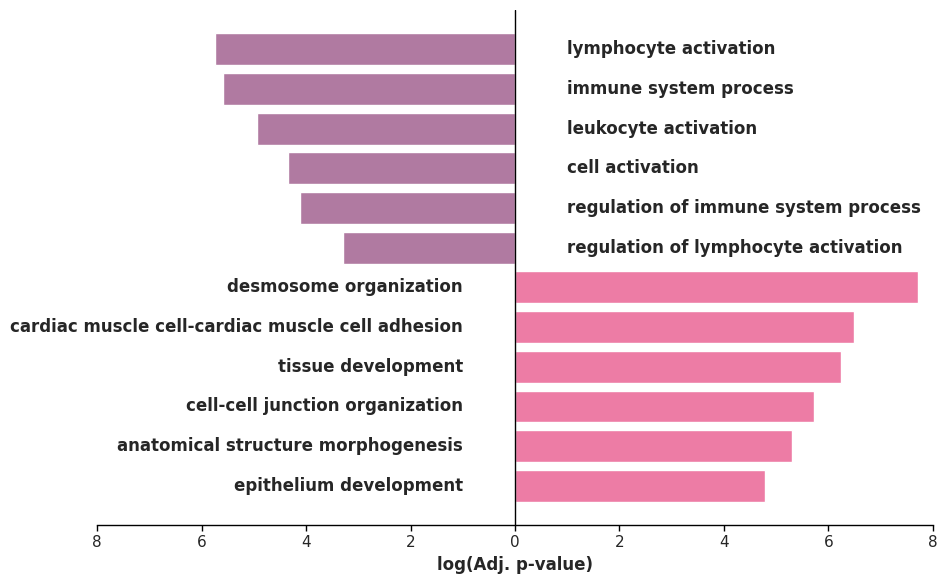

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({
    "Pathway": go_svt["term_name"][:6].tolist() + (go_rctd["term_name"][:6].tolist()),
    "Method": ["SVT"] * 6 + ["RCTD"] * 6,
    "log_adj_pval": [-x for x in go_svt["neg_log10_p_adj"][:6].tolist()] + go_rctd["neg_log10_p_adj"][:6].tolist()
})

# Color mapping
method_colors = {
    "SVT": "#B07AA1",   # muted purple
    "RCTD": "#ED7CA5"   # soft pink
}

# Separate and sort SVT and RCTD as requested
svt = data[data["Method"] == "SVT"].sort_values("log_adj_pval", ascending=False)  # more negative = more significant
rctd = data[data["Method"] == "RCTD"].sort_values("log_adj_pval")

# Concatenate for plotting order: SVT first (top), then RCTD (bottom)
plot_data = pd.concat([rctd, svt], axis=0).reset_index(drop=True)

# Start plotting
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot horizontal bars
for i, row in plot_data.iterrows():
    ax.barh(
        y=i,
        width=row["log_adj_pval"],
        color=method_colors[row["Method"]],
        height=0.8
    )

    # Label on opposite side of the bar
    if row["Method"] == "SVT":
        ax.text(
            x=1,  # right side of plot
            y=i,
            s=row["Pathway"],
            va='center',
            ha='left',
            fontsize=12,
            fontweight='bold'
        )
    else:  # RCTD
        ax.text(
            x=-1,  # left side of plot
            y=i,
            s=row["Pathway"],
            va='center',
            ha='right',
            fontsize=12,
            fontweight='bold'
        )

# Remove y-axis ticks/labels
ax.set_yticks([])

# X-axis styling
ax.axvline(0, color='black', lw=1)
ax.set_xlabel("log(Adj. p-value)", fontsize=12, weight='bold')

# Clean up spines
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1)

# Ticks
ax.tick_params(axis='x', direction='out', length=4, width=1)
# x lim -8, 8
ax.set_xlim(-8, 8)
# Take abs on x label
ax.set_xticklabels([str(abs(int(x))) for x in ax.get_xticks()])

# Remove grid
ax.grid(False)

# Add small outward ticks
ax.tick_params(
    axis='both',
    which='major',
    direction='out',
    length=4,
    width=1,
    color='black',
    bottom=True, top=False, left=True, right=False
)


plt.tight_layout()
plt.show()

### Visualization for figure 6 b,c

In [43]:


# x_min, x_max, y_min, y_max = 54000, 56000, 2000, 4000
x_min, x_max, y_min, y_max = 55500, 55640, 3480, 3620
sdata_roi = sdata_hd.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("x", "y"), target_coordinate_system="global"
)
sdata_roi.shapes["svt_seg"]["svt_seg"] = sdata_roi.shapes["svt_seg"]["svt_seg"].astype("str").replace({
    "Unknown III (SM)": "U_III_SM",
}).astype("category")

# tmp = sdata_roi.tables["square_002um"]
# idx = tmp.var_names.get_loc("CD4")
# values = tmp.X[:, idx].toarray()
# sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_002um"]["CD4"] = values
# sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um_CD4"] = sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"][sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"]["CD4"] > 0]


tmp = sdata_roi.tables["square_002um"]
values = tmp.X.toarray().sum(axis=1)
# Values > 100 set to 100
# values[values > 20] = 20
sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_002um"]["UMI"] = values

# sdata_roi.shapes["rctd_square_008um"]["celltype"] = sdata_roi.shapes["rctd_square_008um"]["celltype"].astype("str").replace({
#     "CD8 T cell": "CD8 Cytotoxic T cell",
#     "Proliferating Fibroblast": "Myofibroblast",
#     "Proliferating Macrophages": "Macrophage",
# }).astype("category")

# Drop cDC I
# drop_ct = ["cDC I", "Adipocyte"]
# sdata_roi.shapes["rctd_square_008um"] = sdata_roi.shapes["rctd_square_008um"][~sdata_roi.shapes["rctd_square_008um"]["celltype"].isin(drop_ct)]


ct_col = sdata_roi.points["stardist_seg_center"].svt_celltype.astype("str")
cts = sdata_roi.points["stardist_seg_center"].svt_celltype.unique().compute()
for ct in cts:
    sdata_roi[f"stardist_seg_center_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = \
    sdata_roi.points["stardist_seg_center"][ct_col == ct]

ct_col = sdata_roi.points["svt_seg_center"].celltype.astype("str")
cts = sdata_roi.points["svt_seg_center"].celltype.unique().compute()
for ct in cts:
    sdata_roi[f"svt_seg_center_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = \
    sdata_roi.points["svt_seg_center"][ct_col == ct]

cts = sdata_roi.shapes["rctd_square_008um_all"].celltype.unique().tolist()
ct_col = sdata_roi.shapes["rctd_square_008um_all"].celltype
for ct in cts:
    sdata_roi[f"rctd_square_008um_{ct.replace(' ', '_').replace('(', '').replace(')', '')}_all"] = \
    sdata_roi.shapes["rctd_square_008um_all"][ct_col == ct]

gdf = gpd.GeoDataFrame(columns=['geometry', 'seg', 'celltype'])

for cell_id in sdata_roi.shapes["svt_seg"]["svt_seg"].unique():
    cell = sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id]
    cell = cell.geometry.tolist()
    merged = unary_union(cell)
    try:
        outer_boundary = merged.exterior
    except:
        continue
    # gdf = gdf.append({'geometry': Polygon(outer_boundary), 'seg': cell_id, 'celltype': sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id].celltype.unique()[0]}, ignore_index=True)
    gdf.loc[len(gdf)] = [Polygon(outer_boundary), cell_id, sdata_roi.shapes["svt_seg"][
        sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id].celltype.unique()[0]]
gdf = sd.models.ShapesModel.parse(gdf)
sdata_roi.shapes["svt_boundary"] = gdf
sdata_roi.shapes["svt_boundary"]["seg"] = sdata_roi.shapes["svt_boundary"]["seg"].astype("category")
sdata_roi.shapes["svt_boundary"]["celltype"] = sdata_roi.shapes["svt_boundary"]["celltype"].astype("category")


ct_col = sdata_roi.shapes["svt_boundary"].celltype
cts = sdata_roi.shapes["svt_boundary"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"svt_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = \
    sdata_roi.shapes["svt_boundary"][ct_col == ct]

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/geop

In [49]:
# In figure 6, for all the tumor cells, use the same color
celltype_mapping_fig6 = celltype_mapping.copy()
celltype_mapping_fig6['Tumor V'] = '#FFA500'

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


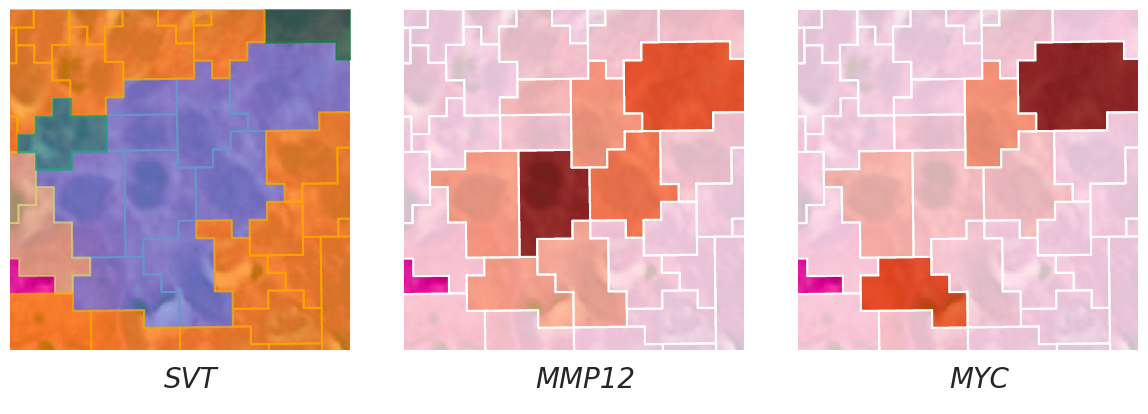

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

tmp = sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image")
draw_cts = sdata_roi.shapes["svt_boundary"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_fig6[ct]
    tmp = tmp.pl.render_shapes(
        f"svt_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}",
        color=color, fill_alpha=0.7, outline_width=1.5, outline_color = color, outline_alpha=0.7
    )
tmp.pl.show(coordinate_systems="global", ax=ax[0], title="", frameon=False, legend_loc='none')

# g = "SOD2"
# g = "MMP12"
g = "MMP12"
sdata_roi.shapes["svt_boundary"][g] = adata_st_svt[list(sdata_roi.shapes["svt_boundary"].seg.values)].X[:, adata_st_svt.var_names.get_loc(g)].toarray()
sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image").pl.render_shapes(
        f"svt_boundary",
        color=g, fill_alpha=0.8, outline_width=1.5, outline_alpha=1, outline_color = "w", cmap='Oranges'
    ).pl.show(coordinate_systems="global", ax=ax[1], title="", frameon=False, legend_loc='none', colorbar=False)

g = "SPP1"
sdata_roi.shapes["svt_boundary"][g] = adata_st_svt[list(sdata_roi.shapes["svt_boundary"].seg.values)].X[:, adata_st_svt.var_names.get_loc(g)].toarray()
sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image").pl.render_shapes(
        f"svt_boundary",
        color=g, fill_alpha=0.8, outline_width=1.5, outline_alpha=1, outline_color = "w", cmap='Oranges'
    ).pl.show(coordinate_systems="global", ax=ax[2], title="", frameon=False, legend_loc='none', colorbar=False)


ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)
ax[2].set_xlim(x_min, x_max)
ax[2].set_ylim(y_min, y_max)

title = ["SVT", "MMP12", "MYC"]
for i in range(3):
    # Axis off
    legend_elements = [Line2D([0], [0], marker= None, color='b', label=title[i], linewidth=0,
                          markeredgecolor="#000000", markerfacecolor="#000000", markersize=20)]
    ax[i].legend(handles=legend_elements, bbox_to_anchor=(0.45,-0.2), loc='lower center', ncol=2, handletextpad=0., prop={'size': 20, 'style': 'italic'}, frameon=False)
    ax[i].axis("off")
plt.tight_layout()

In [51]:
x_min, x_max, y_min, y_max = 54000, 56000, 2000, 4000
# x_min, x_max, y_min, y_max = 60780, 61180, 1700, 2100
sdata_roi = sdata_hd.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("x", "y"), target_coordinate_system="global"
)
sdata_roi.shapes["svt_seg"]["svt_seg"] = sdata_roi.shapes["svt_seg"]["svt_seg"].astype("str").replace({
    "Unknown III (SM)": "U_III_SM",
}).astype("category")

# tmp = sdata_roi.tables["square_002um"]
# idx = tmp.var_names.get_loc("CD4")
# values = tmp.X[:, idx].toarray()
# sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_002um"]["CD4"] = values
# sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um_CD4"] = sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"][sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_008um"]["CD4"] > 0]


tmp = sdata_roi.tables["square_002um"]
values = tmp.X.toarray().sum(axis=1)
# Values > 100 set to 100
# values[values > 20] = 20
sdata_roi.shapes["Visium_HD_Human_Colon_Cancer_P2_square_002um"]["UMI"] = values

# sdata_roi.shapes["rctd_square_008um"]["celltype"] = sdata_roi.shapes["rctd_square_008um"]["celltype"].astype("str").replace({
#     "CD8 T cell": "CD8 Cytotoxic T cell",
#     "Proliferating Fibroblast": "Myofibroblast",
#     "Proliferating Macrophages": "Macrophage",
# }).astype("category")

# Drop cDC I
# drop_ct = ["cDC I", "Adipocyte"]
# sdata_roi.shapes["rctd_square_008um"] = sdata_roi.shapes["rctd_square_008um"][~sdata_roi.shapes["rctd_square_008um"]["celltype"].isin(drop_ct)]


ct_col = sdata_roi.points["stardist_seg_center"].svt_celltype.astype("str")
cts = sdata_roi.points["stardist_seg_center"].svt_celltype.unique().compute()
for ct in cts:
    sdata_roi[f"stardist_seg_center_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = sdata_roi.points["stardist_seg_center"][ct_col == ct]


ct_col = sdata_roi.points["svt_seg_center"].celltype.astype("str")
cts = sdata_roi.points["svt_seg_center"].celltype.unique().compute()
for ct in cts:
    sdata_roi[f"svt_seg_center_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = sdata_roi.points["svt_seg_center"][ct_col == ct]

cts = sdata_roi.shapes["rctd_square_008um_all"].celltype.unique().tolist()
ct_col = sdata_roi.shapes["rctd_square_008um_all"].celltype
for ct in cts:
    sdata_roi[f"rctd_square_008um_{ct.replace(' ', '_').replace('(', '').replace(')', '')}_all"] = sdata_roi.shapes["rctd_square_008um_all"][ct_col == ct]

gdf = gpd.GeoDataFrame(columns=['geometry','seg', 'celltype'])

for cell_id in sdata_roi.shapes["svt_seg"]["svt_seg"].unique():
    cell = sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id]
    cell = cell.geometry.tolist()
    merged = unary_union(cell)
    try:
        outer_boundary = merged.exterior
    except:
        continue
    # gdf = gdf.append({'geometry': Polygon(outer_boundary), 'seg': cell_id, 'celltype': sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id].celltype.unique()[0]}, ignore_index=True)
    gdf.loc[len(gdf)] = [Polygon(outer_boundary), cell_id, sdata_roi.shapes["svt_seg"][sdata_roi.shapes["svt_seg"]["svt_seg"] == cell_id].celltype.unique()[0]]
gdf = sd.models.ShapesModel.parse(gdf)
sdata_roi.shapes["svt_boundary"] = gdf
sdata_roi.shapes["svt_boundary"]["seg"] = sdata_roi.shapes["svt_boundary"]["seg"].astype("category")
sdata_roi.shapes["svt_boundary"]["celltype"] = sdata_roi.shapes["svt_boundary"]["celltype"].astype("category")

ct_col = sdata_roi.shapes["svt_boundary"].celltype
cts = sdata_roi.shapes["svt_boundary"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"svt_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = sdata_roi.shapes["svt_boundary"][ct_col == ct]

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/geop

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


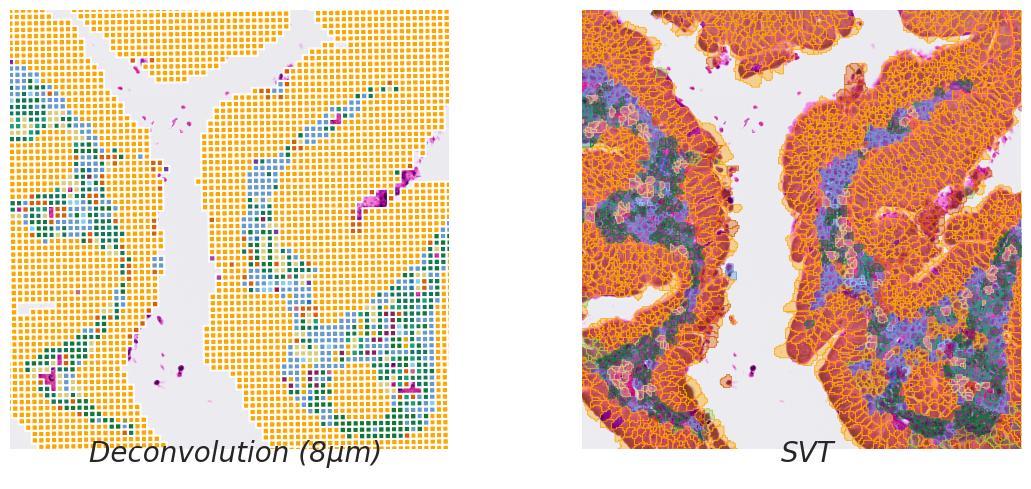

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

draw_cts = sdata_roi.shapes["rctd_square_008um_all"].celltype.unique().tolist()
tmp = sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image")
for ct in draw_cts:
    color = celltype_mapping_fig6[ct]
    tmp = tmp.pl.render_shapes(
        f"rctd_square_008um_{ct.replace(' ', '_').replace('(', '').replace(')', '')}_all",
        color=color,
    )
tmp.pl.show(coordinate_systems="global", ax=ax[0], title="", frameon=False, legend_loc='none', return_ax=True)

tmp = sdata_roi.pl.render_images(
     "Visium_HD_Human_Colon_Cancer_P2_full_image")
draw_cts = sdata_roi.shapes["svt_boundary"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_fig6[ct]
    tmp = tmp.pl.render_shapes(
        f"svt_boundary_{ct.replace(' ', '_').replace('(', '').replace(')', '')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )


tmp.pl.show(coordinate_systems="global", ax=ax[1], title="", frameon=False, legend_loc='none')

ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)

title = ["Deconvolution (8µm)", "SVT"]
for i in range(2):
    # Axis off
    legend_elements = [Line2D([0], [0], marker= None, color='b', label=title[i], linewidth=0,
                          markeredgecolor="#000000", markerfacecolor="#000000", markersize=20)]
    ax[i].legend(handles=legend_elements, bbox_to_anchor=(0.45,-0.2), loc='lower center', ncol=2, handletextpad=0., prop={'size': 20, 'style': 'italic'}, frameon=False)
    ax[i].axis("off")
plt.tight_layout()